### NLP Project on Question Answer Scoring System

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import spacy

Importing the file

In [ ]:
try:
    # Try reading the CSV file with UTF-8 encoding
    df = pd.read_csv('/content/New Microsoft Excel Worksheet.csv')
except UnicodeDecodeError:
    # If UTF-8 decoding fails, try reading with a different encoding
    df = pd.read_csv('/content/New Microsoft Excel Worksheet.csv', encoding='ISO-8859-1')

In [ ]:
df.head() # Reading the dataset

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  
0  Supervised learning is a machine learning para...  
1  Supervised learning is a method where models a...  
2  Supervised learning involves algorithms like l...  
3  Supervised learning involves several algorithm...  
4     The area of a rectangle is length times width.

In [ ]:
df.shape # checking number of rows and columns in the dataset

(48, 7)

In [ ]:
df.duplicated().sum() # checking for any duplicate values in the dataset

0

In [ ]:
df.info() # Info about the column type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21 non-null     float64
 1   Student ID     48 non-null     int64  
 2   Student Name   48 non-null     object 
 3   Question ID    48 non-null     object 
 4   Question Type  48 non-null     object 
 5   Question       48 non-null     object 
 6   Answer         48 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ KB


In [ ]:
ques_type=df['Question Type'].value_counts()
ques_type

Question Type
Conceptual & Formulae    28
Conceptual               20
Name: count, dtype: int64

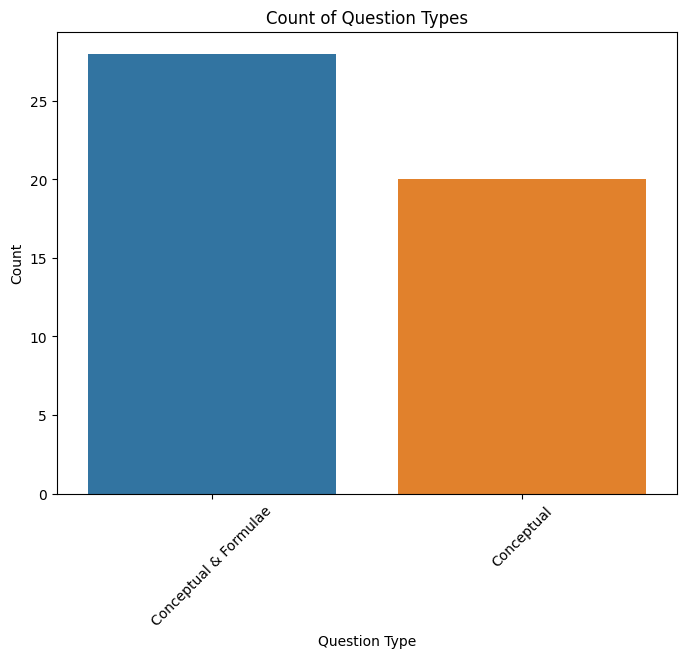

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated ques_type as you mentioned
ques_type = df['Question Type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ques_type.index, y=ques_type.values, hue=ques_type.index)
plt.title('Count of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()


In [ ]:
df['Question_length'] = df['Question'].apply(len) # number of characters
df['Answer-length'] = df['Answer'].apply(len) # number of characters
df.head()

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  
0            265  
1            177  
2            144  
3             87  
4             46

In [ ]:
# number of words
df['num_words_question'] = df['Question'].apply(lambda x: len(x.split()))
df['num_words_answer'] = df['Answer'].apply(lambda x: len(x.split()))
df.head()

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  num_words_answer  
0            265                   9                37  
1            177                   9                27  
2            144                   9                19  
3             87                   9                11  
4             46                   9                 9

Tokenization, Lemmatization, Stop Words Removal using Spacy

In [ ]:
!pip install spacy # installing the sapcy library

Tokenization, Lemmatization, Stop Words Removal using Spacy

In [ ]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess_text_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract lemmatized tokens excluding stop words and punctuation
    lemmatized_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return lemmatized_tokens

# Apply preprocessing to 'Question' and 'Answer' columns
df['Tokenized_Question'] = df['Question'].apply(preprocess_text_spacy)
df['Tokenized_Answer'] = df['Answer'].apply(preprocess_text_spacy)

# Display the DataFrame with tokenized and lemmatized text
df.head()

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  num_words_answer  \
0            265                   9                37   
1            177                   9                27   
2            144                   9                19   
3             87                   9                11   
4             46                   9                 9   

                                  Tokenized_Question  \
0  [define, supervised, learning, explain, charac...   
1  [define, supervised, learning, explain, charac...   
2  [define, supervised, learning, explain, charac...   
3  [define, supervised, learning, explain, charac...   
4                       [calculate, area, rectangle]   

                                    Tokenized_Answer  
0  [supervised, learning, machine, learn, paradig...  
1  [supervised, learning, method, model, train, l...  
2  [supervised, learning, involve, algorithm, lik...  
3  [supervised, learning, involve, algorithm, pre...  
4             [area, rectangle, length, time, width]

Generating word cloud for each quetion and its respective answers

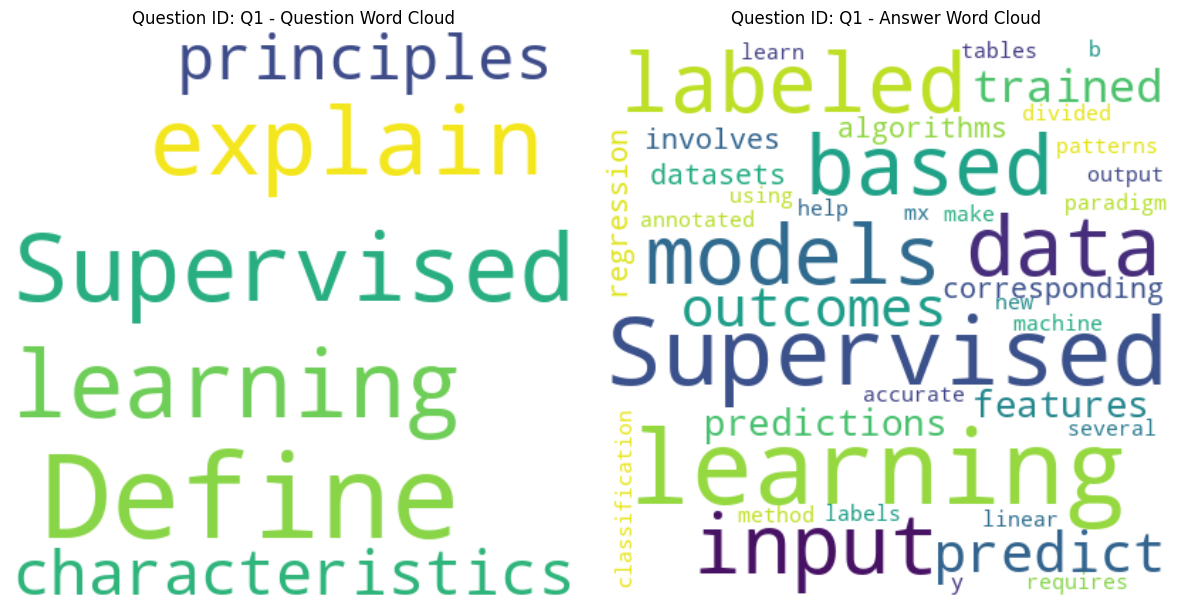

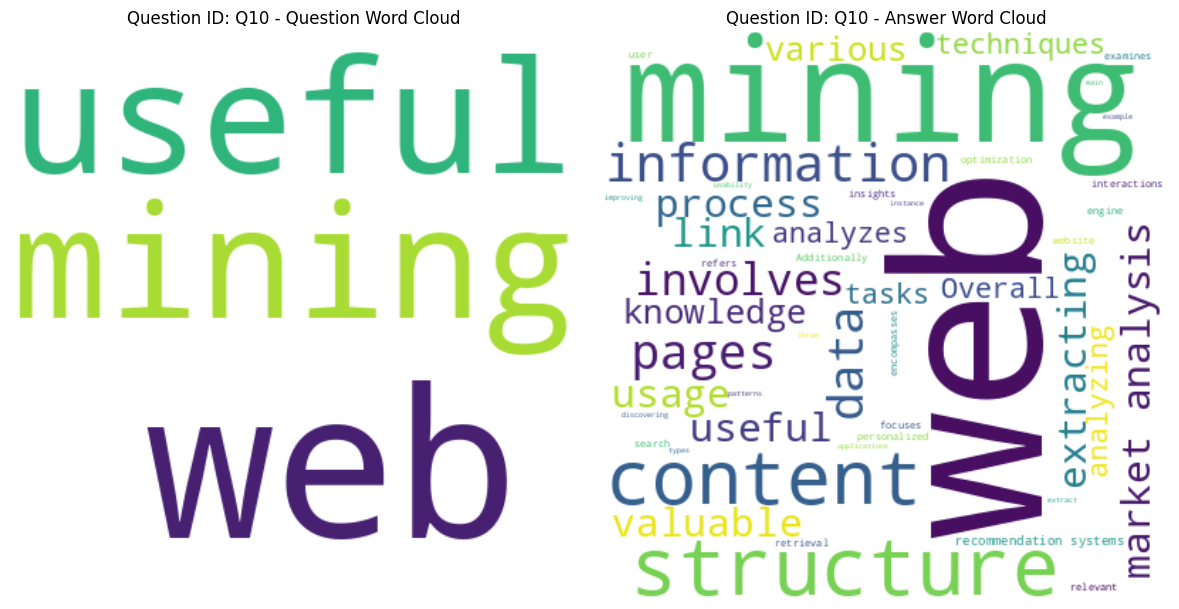

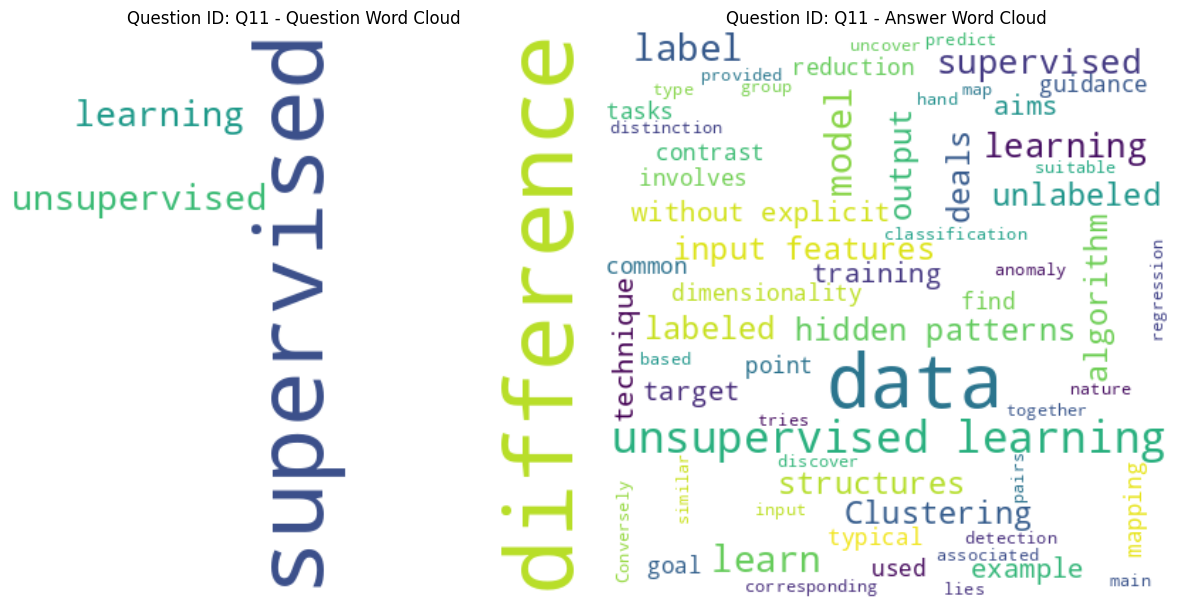

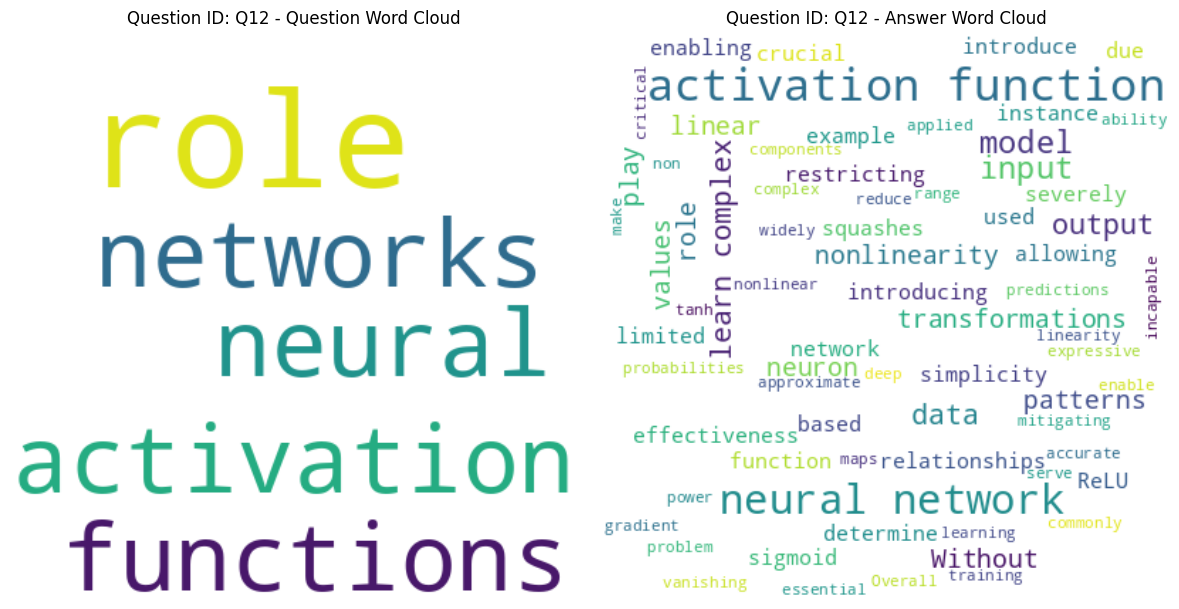

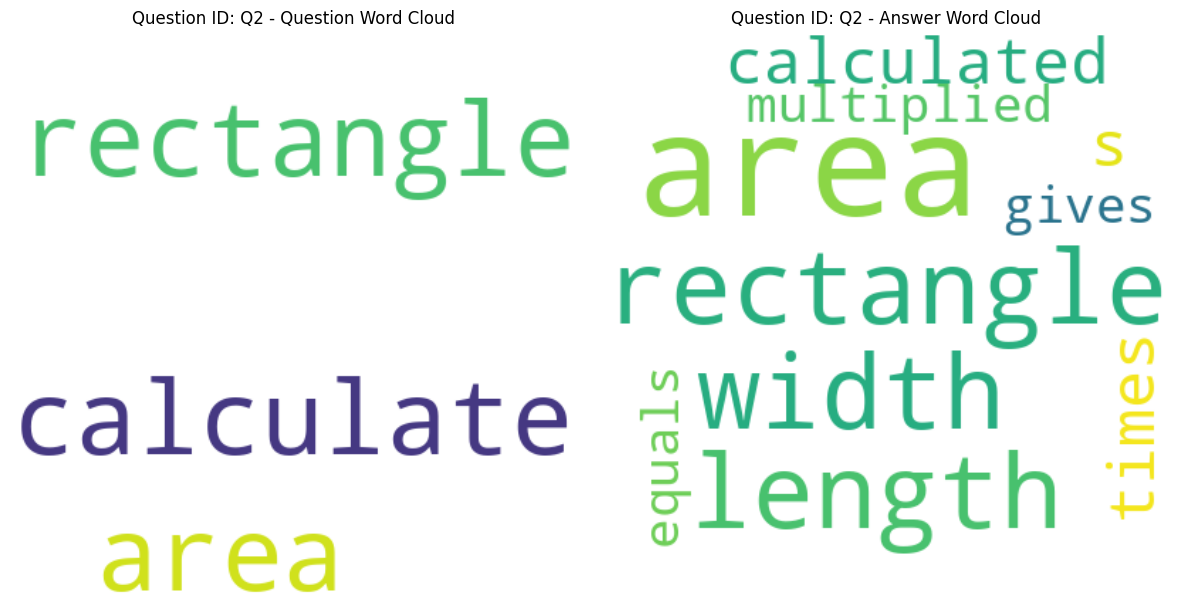

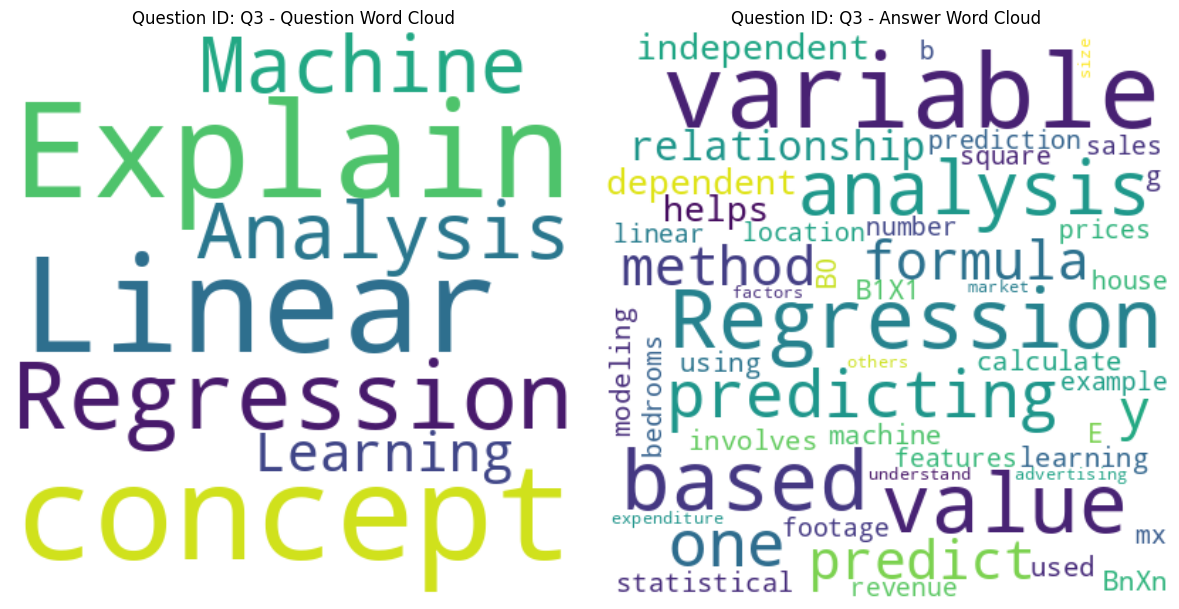

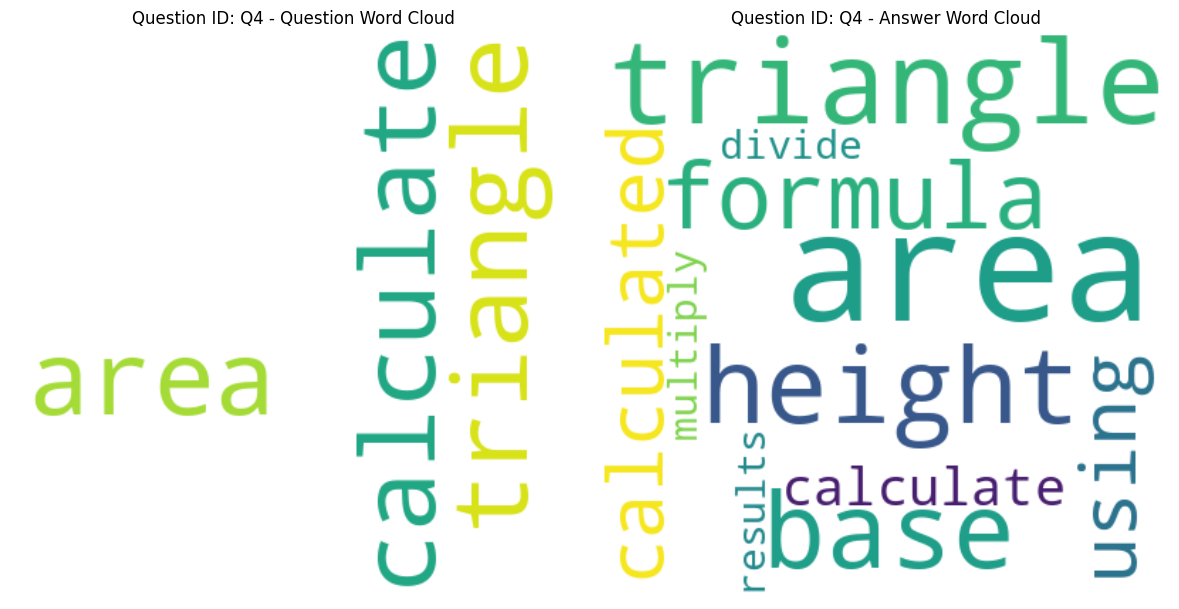

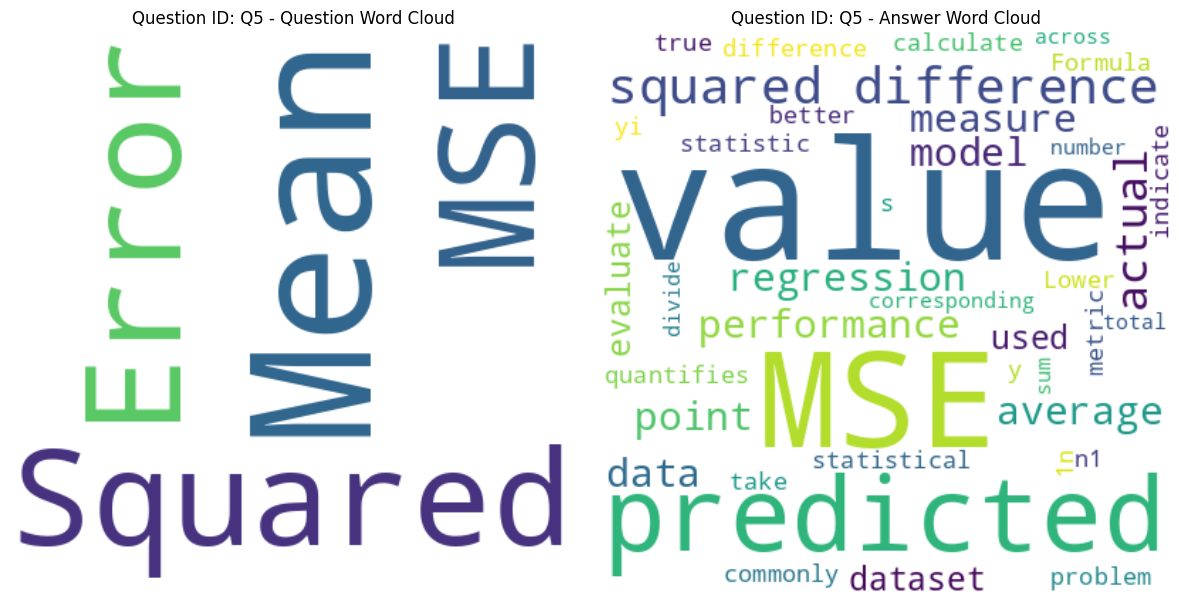

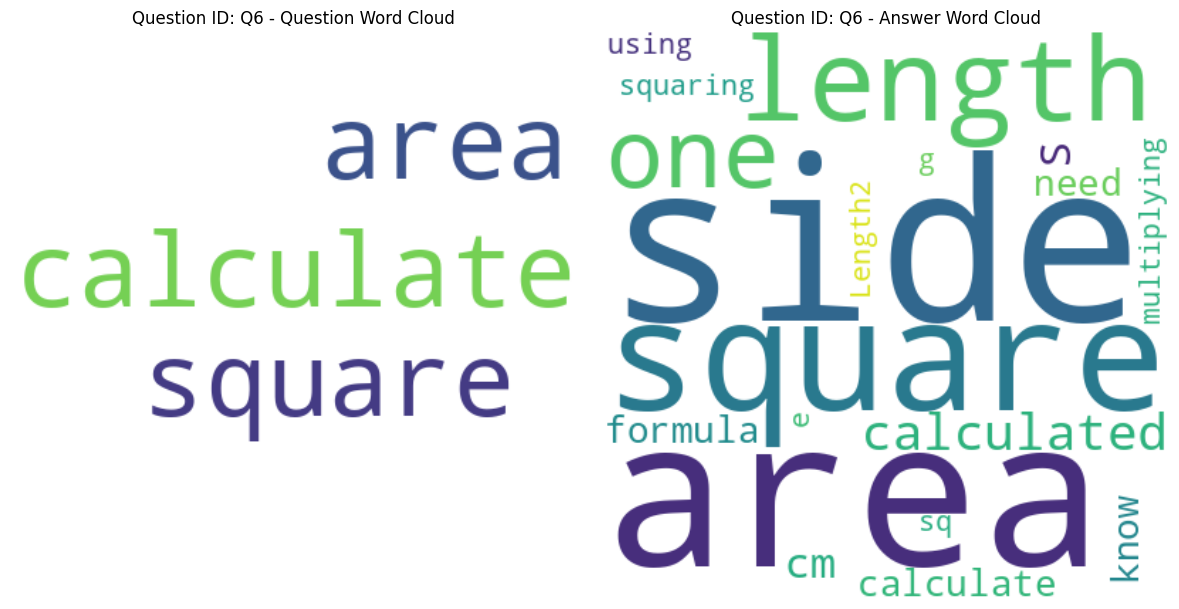

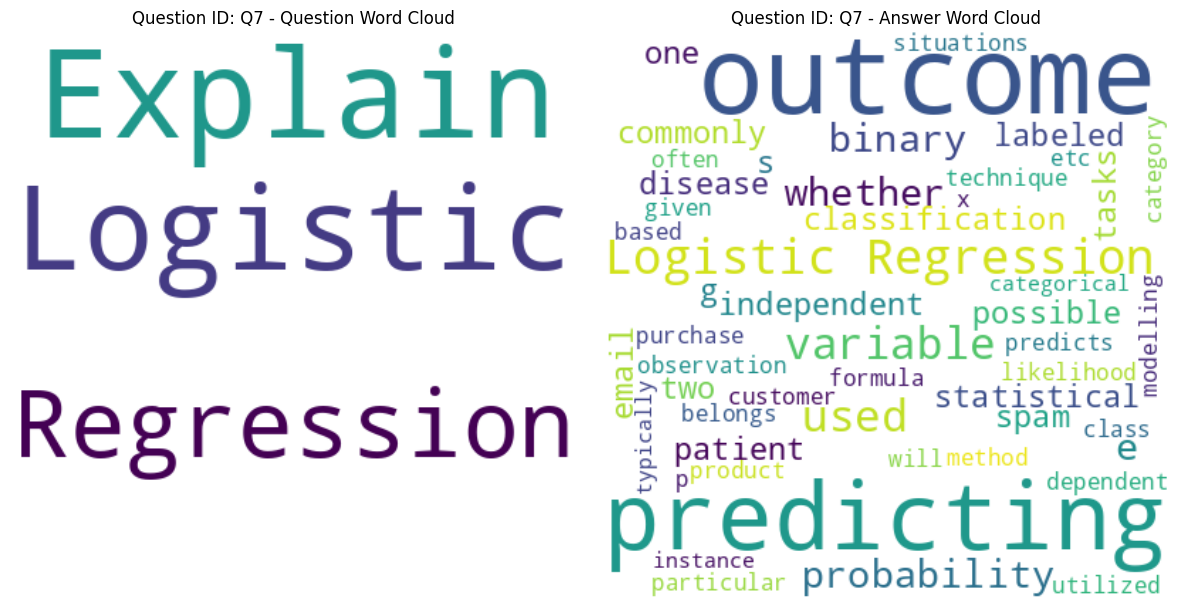

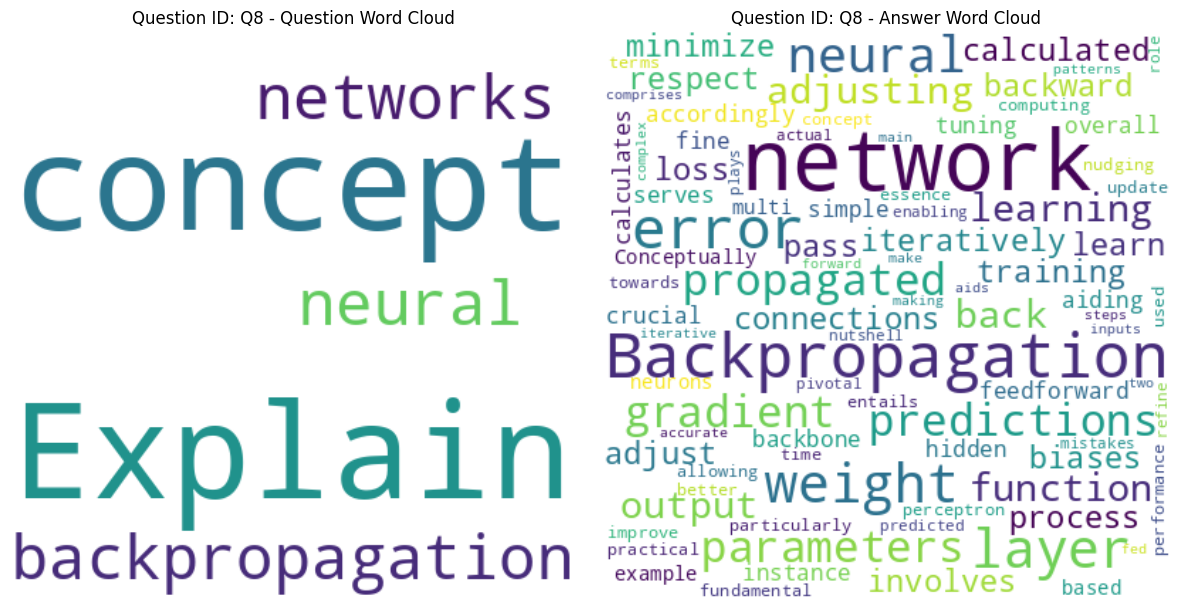

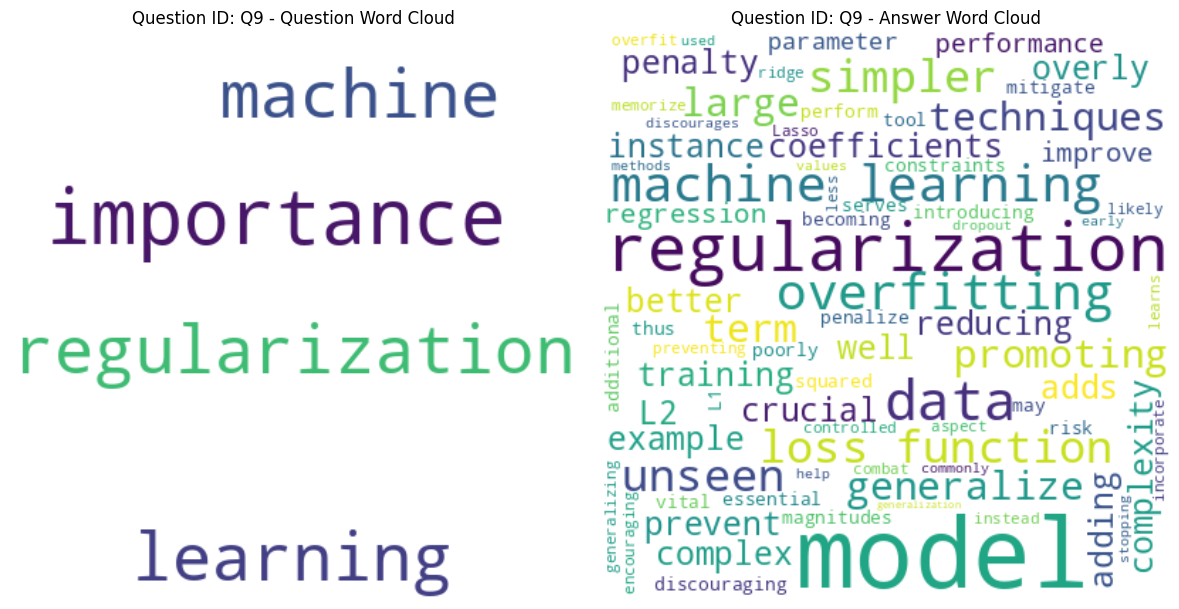

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the generate_wordcloud function if not already defined
def generate_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Assuming df is your DataFrame containing the data
grouped_df = df.groupby('Question ID')

# Now, grouped_df contains groups of data based on the 'Question ID' column
# You can iterate over these groups and perform operations on each group
for question_id, group_data in grouped_df:
    # Perform operations on each group, such as generating word clouds
    question_text = ' '.join(group_data['Question'])  # Joining all questions in the group
    answer_text = ' '.join(group_data['Answer'])  # Joining all answers in the group

    # Create a figure with two subplots for question and answer word clouds
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Generate word clouds for this group
    question_title = f"Question ID: {question_id} - Question Word Cloud"
    answer_title = f"Question ID: {question_id} - Answer Word Cloud"
    generate_wordcloud(question_text, question_title, axes[0])
    generate_wordcloud(answer_text, answer_title, axes[1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [ ]:
!python -m spacy download en-core-web-sh


✘ No compatible package found for 'en-core-web-sh' (spaCy v3.7.4)



In [ ]:
nlp=spacy.load('en_core_web_sm')

Processing text using Spacy

In [ ]:
# Function to process text using spaCy
def process_text(text):
    doc = nlp(text)  # Process the text with spaCy

    # Iterate over each token in the document
    for token in doc:
        # Check if the token is not a stop word and not a punctuation
        if not token.is_stop and not token.is_punct:
            # Print the token's text, lemma, part-of-speech tag, dependency label, shape, and whether it's alphanumeric
            print(token.text.lower(), token.lemma_, token.pos_, token.tag_, token.dep_,
                  token.shape_, token.is_alpha)

# Group by 'Question ID' and apply spaCy processing to 'Answer' column within each group
grouped = df.groupby('Question ID')['Answer'].apply(lambda x: ' '.join(x.tolist()))
for question_id, text in grouped.items():
    print(f"\nProcessing Question ID: {question_id}\n")
    process_text(text)


Processing Question ID: Q1

supervised supervised ADJ JJ amod Xxxxx True
learning learning NOUN NN nsubj xxxx True
machine machine NOUN NN npadvmod xxxx True
learning learn VERB VBG compound xxxx True
paradigm paradigm NOUN NN attr xxxx True
models model NOUN NNS nsubjpass xxxx True
trained train VERB VBN relcl xxxx True
labeled label VERB VBN amod xxxx True
data datum NOUN NNS dobj xxxx True
predictions prediction NOUN NNS dobj xxxx True
based base VERB VBN acl xxxx True
input input NOUN NN compound xxxx True
features feature NOUN NNS pobj xxxx True
corresponding correspond VERB VBG amod xxxx True
output output NOUN NN compound xxxx True
tables table NOUN NNS conj xxxx True
requires require VERB VBZ ROOT xxxx True
annotated annotated ADJ JJ amod xxxx True
datasets dataset NOUN NNS dobj xxxx True
divided divide VERB VBN ROOT xxxx True
classification classification NOUN NN pobj xxxx True
regression regression NOUN NN conj xxxx True
supervised supervised ADJ JJ amod Xxxxx True
learning 

In [ ]:
# number of sentences
df['num_sent_quest'] = df['Question'].apply(lambda x: len(list(nlp(x).sents)))
df['num_sent_ans'] = df['Answer'].apply(lambda x: len(list(nlp(x).sents)))
df.head(1)

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   

   Answer-length  num_words_question  num_words_answer  \
0            265                   9                37   

                                  Tokenized_Question  \
0  [define, supervised, learning, explain, charac...   

                                    Tokenized_Answer  num_sent_quest  \
0  [supervised, learning, machine, learn, paradig...               1   

   num_sent_ans  
0             3

In [ ]:
df[['Question_length',  'Answer-length', 'num_words_question', 'num_words_answer', 'num_sent_quest', 'num_sent_ans' ]].describe()

Question_length  Answer-length  num_words_question  num_words_answer  \
count        48.000000      48.000000           48.000000         48.000000   
mean         51.833333     287.250000            8.250000         43.416667   
std          14.811343     167.979419            2.026421         23.839743   
min          28.000000      46.000000            3.000000          9.000000   
25%          41.500000     123.750000            8.750000         21.500000   
50%          51.500000     253.500000            9.000000         39.500000   
75%          62.750000     449.000000            9.000000         65.000000   
max          74.000000     545.000000           10.000000         82.000000   

       num_sent_quest  num_sent_ans  
count            48.0     48.000000  
mean              1.0      2.687500  
std               0.0      1.205594  
min               1.0      1.000000  
25%               1.0      2.000000  
50%               1.0      3.000000  
75%               1.0      4.000000  
max               1.0      5.000000

In [ ]:
from spacy import displacy

# Group by 'Question ID' and apply the token loop to the 'Answer' column within each group
grouped = df.groupby('Question ID')['Answer']

for question_id, answers in grouped:
    print(f"\nProcessing Question ID: {question_id}\n")
    for answer in answers:
        doc = nlp(answer)
        displacy.render(doc, style="dep", jupyter=True, options={"distance": 120})


Processing Question ID: Q1




Processing Question ID: Q10




Processing Question ID: Q11




Processing Question ID: Q12




Processing Question ID: Q2




Processing Question ID: Q3




Processing Question ID: Q4




Processing Question ID: Q5




Processing Question ID: Q6




Processing Question ID: Q7




Processing Question ID: Q8




Processing Question ID: Q9



### Scoring

1. Based on Count of Noun and Verb

In [ ]:
# Load English language model
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Function to extract key phrases, concepts, or keywords from text
def extract_keywords(text):
    doc = nlp(text)

    # Initialize counters for nouns and verbs
    noun_count = 0
    verb_count = 0

    # Iterate over each token in the document
    for token in doc:
        if token.pos_ == "NOUN":
            noun_count += 1
        elif token.pos_ == "VERB":
            verb_count += 1

    return noun_count, verb_count

# Define scoring system
def score_answer(noun_count, verb_count):
    if noun_count > 5 and verb_count >= 2:
        return 1
    else:
        return 0

# Apply keyword extraction and scoring to each row and create a new column
df['score_noun_verb'] = df['Answer'].apply(lambda x: score_answer(*extract_keywords(x)))


In [ ]:
!pip install language-tool-python

2. Based on correctness of Grammer

In [ ]:
import language_tool_python
import pandas as pd

# Create an instance of LanguageTool
tool = language_tool_python.LanguageTool('en-US')

# Function to calculate grammar check score for the answer
def calculate_grammar_check_score(answer):
    # Check for punctuation and grammar errors in the answer
    matches = tool.check(answer)

    # Calculate grammar check score based on the number of errors found
    num_errors = len(matches)
    if num_errors == 0:
        return 1.0  # Perfect grammar
    else:
        return max(0.0, 1.0 - (0.1 * num_errors))  # Reduce score by 0.1 for each error

# Group by 'Question ID' and apply the grammar check score calculation to the 'Answer' column within each group
grouped = df.groupby('Question ID')['Answer']

# Apply grammar check score calculation to each answer and create a new column
df['score_grammar_check'] = grouped.transform(lambda x: x.apply(calculate_grammar_check_score))

# Display the DataFrame with the new column
df.head()

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpk3b2fjn_.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  num_words_answer  \
0            265                   9                37   
1            177                   9                27   
2            144                   9                19   
3             87                   9                11   
4             46                   9                 9   

                                  Tokenized_Question  \
0  [define, supervised, learning, explain, charac...   
1  [define, supervised, learning, explain, charac...   
2  [define, supervised, learning, explain, charac...   
3  [define, supervised, learning, explain, charac...   
4                       [calculate, area, rectangle]   

                                    Tokenized_Answer  num_sent_quest  \
0  [supervised, learning, machine, learn, paradig...               1   
1  [supervised, learning, method, model, train, l...               1   
2  [supervised, learning, involve, algorithm, lik...               1   
3  [supervised, learning, involve, algorithm, pre...               1   
4             [area, rectangle, length, time, width]               1   

   num_sent_ans  score_noun_verb  score_grammar_check  
0             3                1                  1.0  
1             2                1                  1.0  
2             2                1                  0.9  
3             1                0                  1.0  
4             1                0                  1.0

3. Based on the length of the sentences used in Answers

In [ ]:
# Apply the condition to create the new column
df['score_sent_len'] = df['num_sent_ans'].apply(lambda x: 1 if x > 1 else 0)

df.head()

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  num_words_answer  \
0            265                   9                37   
1            177                   9                27   
2            144                   9                19   
3             87                   9                11   
4             46                   9                 9   

                                  Tokenized_Question  \
0  [define, supervised, learning, explain, charac...   
1  [define, supervised, learning, explain, charac...   
2  [define, supervised, learning, explain, charac...   
3  [define, supervised, learning, explain, charac...   
4                       [calculate, area, rectangle]   

                                    Tokenized_Answer  num_sent_quest  \
0  [supervised, learning, machine, learn, paradig...               1   
1  [supervised, learning, method, model, train, l...               1   
2  [supervised, learning, involve, algorithm, lik...               1   
3  [supervised, learning, involve, algorithm, pre...               1   
4             [area, rectangle, length, time, width]               1   

   num_sent_ans  score_noun_verb  score_grammar_check  score_sent_len  
0             3                1                  1.0               1  
1             2                1                  1.0               1  
2             2                1                  0.9               1  
3             1                0                  1.0               0  
4             1                0                  1.0               0

Scoring without transformer

In [ ]:
import spacy
import language_tool_python
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Initialize LanguageTool for grammar checking
tool = language_tool_python.LanguageTool("en-US")

# Function to extract counts of nouns and verbs
def extract_nouns_and_verbs(text):
    doc = nlp(text)
    noun_count = 0
    verb_count = 0
    for token in doc:
        if token.pos_ == "NOUN":
            noun_count += 1
        elif token.pos_ == "VERB":
            verb_count += 1
    return noun_count, verb_count

# Function to calculate the score based on nouns and verbs
def score_noun_verb(noun_count, verb_count):
    if noun_count > 5 and verb_count >= 2:
        return 1  # Satisfies condition
    return 0  # Does not satisfy condition

# Function to calculate grammar correctness score
def calculate_grammar_score(text):
    matches = tool.check(text)
    num_errors = len(matches)
    if num_errors == 0:
        return 1.0  # No errors
    else:
        return max(0.0, 1.0 - (0.1 * num_errors))  # Deduct score based on errors

# Function to calculate the score based on sentence length
def score_sentence_length(num_sentences):
    return 1 if num_sentences > 1 else 0

# Function to calculate cumulative score
def calculate_cumulative_score(text, num_sentences):
    noun_count, verb_count = extract_nouns_and_verbs(text)

    # Calculate individual scores
    score_noun_verb_ = score_noun_verb(noun_count, verb_count)
    score_grammar_ = calculate_grammar_score(text)
    score_sent_len_ = score_sentence_length(num_sentences)

    # Weights for each scoring parameter
    weights = {
        "score_noun_verb": 0.3,
        "score_grammar": 0.6,
        "score_sent_len": 0.1,
    }

    # Cumulative score using weighted sum
    cumulative_score = (
        score_noun_verb_ * weights["score_noun_verb"] +
        score_grammar_ * weights["score_grammar"] +
        score_sent_len_ * weights["score_sent_len"]
    )

    return cumulative_score

# Test the function with some examples
answer_text = "This is a simple example to demonstrate the scoring system."
num_sentences = 1  # Example with a single sentence
score = calculate_cumulative_score(answer_text, num_sentences)

print("Cumulative Score:", score)


Cumulative Score: 0.6


4. Based on Scoring System using Transformers (Default Model)

In [ ]:
from transformers import pipeline
import pandas as pd

# Group by 'Question ID' and collect questions and answers
grouped_data = df.groupby('Question ID')
questions = grouped_data['Question'].unique()
contexts = grouped_data['Answer'].apply(list)

# Creating Pipeline
q_a_pipeline = pipeline("question-answering")

# Create an empty list to store scores
score_list = []

# Iterate over questions and contexts
for i, (question, context_list) in enumerate(zip(questions, contexts), start=1):
    for j, context in enumerate(context_list, start=1):
        answer = q_a_pipeline(question=question[0], context=context)
        # Append confidence score to score_list
        score_list.append(answer['score'] + 1)  # Adding 1 to the score

# Append score_list to the DataFrame as a new column
df['score_transformer'] = score_list

# Display the updated DataFrame
df.head()


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  num_words_answer  \
0            265                   9                37   
1            177                   9                27   
2            144                   9                19   
3             87                   9                11   
4             46                   9                 9   

                                  Tokenized_Question  \
0  [define, supervised, learning, explain, charac...   
1  [define, supervised, learning, explain, charac...   
2  [define, supervised, learning, explain, charac...   
3  [define, supervised, learning, explain, charac...   
4                       [calculate, area, rectangle]   

                                    Tokenized_Answer  num_sent_quest  \
0  [supervised, learning, machine, learn, paradig...               1   
1  [supervised, learning, method, model, train, l...               1   
2  [supervised, learning, involve, algorithm, lik...               1   
3  [supervised, learning, involve, algorithm, pre...               1   
4             [area, rectangle, length, time, width]               1   

   num_sent_ans  score_noun_verb  score_grammar_check  score_sent_len  \
0             3                1                  1.0               1   
1             2                1                  1.0               1   
2             2                1                  0.9               1   
3             1                0                  1.0               0   
4             1                0                  1.0               0   

   score_transformer  
0           1.036304  
1           1.317218  
2           1.115964  
3           1.124591  
4           1.135514

In [ ]:
df['Answer'][0]

'Supervised learning is a machine learning paradigm where models are trained using labeled data to make predictions based on input features and corresponding output tables. It requires annotated datasets. It is further divided into “classification” and “regression”.'

5. Score using Pretrained Transformer Models:

  5.1. deepset/roberta-base-squad2

  5.2. twmkn9/bert-base-uncased-squad2

  5.3. mrm8488/bert-tiny-finetuned-squadv2

  5.4. ktrapeznikov/albert-xlarge-v2-squad-v2

  5.5. mrm8488/bert-small-finetuned-squadv2

In [ ]:
import pandas as pd
from transformers import pipeline

models = ["deepset/roberta-base-squad2",
          "twmkn9/bert-base-uncased-squad2",
          "mrm8488/bert-tiny-finetuned-squadv2",
          "ktrapeznikov/albert-xlarge-v2-squad-v2",
          "mrm8488/bert-small-finetuned-squadv2"]

def score_answer(question, context):
    results = []
    for model_name in models:
        print(f"Evaluating model: {model_name}")
        qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=model_name)
        result = qa_pipeline(question=question, context=context)
        print(f"Score: {result['score']}, Answer: {result['answer']}")
        results.append((model_name, result['score'], result['answer']))
    return results

def generate_scores(df):
    scores_data = []

    grouped = df.groupby(['Student Name', 'Question ID'])  # Group by both 'Student Name' and 'Question ID'
    for (student_name, question_id), group_df in grouped:
        question = group_df.iloc[0]['Question ID']  # Assuming 'question_id' is the column name
        answers = []
        model_scores = {}
        for model_name in models:
            model_scores[model_name] = []
        for _, row in group_df.iterrows():
            question = row['Question']
            context = row['Answer']
            result = score_answer(question, context)
            answers.extend([result[i][2] for i in range(len(models))])
            for i, (model_name, score, _) in enumerate(result):
                model_scores[model_name].append(score)
        row_data = {'student_name': student_name, 'question_id': question_id, 'answer': answers}
        row_data.update({f'{model_name}_score': model_scores[model_name] for model_name in models})
        scores_data.append(row_data)
    scores_df = pd.DataFrame(scores_data)
    return scores_df

def main():
    # Assuming `df` is your DataFrame
    df = pd.read_csv('/content/New Microsoft Excel Worksheet.csv')  # Load your data from a CSV file or wherever it's stored
    scores_df = generate_scores(df)
    print(scores_df)

if __name__ == "__main__":
    main()


Evaluating model: deepset/roberta-base-squad2


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Score: 0.0015673033194616437, Answer: Supervised learning involves several algorithms which predict outcomes based on inputs.
Evaluating model: twmkn9/bert-base-uncased-squad2


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Score: 0.18799211084842682, Answer: several algorithms which predict outcomes based on inputs
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2


config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Score: 0.018526049330830574, Answer: Supervised learning involves several algorithms which predict outcomes based on inputs
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


config.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/235M [00:00<?, ?B/s]

Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Score: 0.004565733019262552, Answer:  algorithms
Evaluating model: mrm8488/bert-small-finetuned-squadv2


config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/115M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Score: 0.09303916990756989, Answer: several algorithms
Evaluating model: deepset/roberta-base-squad2
Score: 0.2520126402378082, Answer: information retrieval, market analysis, and improving website usability
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4640170633792877, Answer: extracting valuable knowledge and insights from web data
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.0020327232778072357, Answer: retrieval, market analysis, and improving website usability
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.3329858183860779, Answer:  process of extracting valuable knowledge and insights from web data.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.27905741333961487, Answer: improving website usability
Evaluating model: deepset/roberta-base-squad2
Score: 0.4880933463573456, Answer: the nature of the data used for training
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.658662736415863, Answer: the nature of the data used for training
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.007409071084111929, Answer: In supervised learning, the algorithm learns from labeled data
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4712440073490143, Answer:  the nature of the data used for training.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.25877365469932556, Answer: in the nature of the data used for training
Evaluating model: deepset/roberta-base-squad2
Score: 0.11728406697511673, Answer: critical role in neural networks by introducing nonlinearity to the model
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.9143168926239014, Answer: introducing nonlinearity to the model
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.007409918121993542, Answer: critical role in neural networks by introducing nonlinearity to the model
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.213765487074852, Answer:  introducing nonlinearity to the model.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.21584771573543549, Answer: introducing nonlinearity to the model
Evaluating model: deepset/roberta-base-squad2
Score: 0.7061002850532532, Answer: length * width
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.6888106465339661, Answer: equals length * width
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0379038006067276, Answer: The area of a rectangle equals length * width
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.3694658577442169, Answer:  equals length * width.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.3852526843547821, Answer: equals length * width
Evaluating model: deepset/roberta-base-squad2
Score: 0.006597019731998444, Answer: predict the relationship between variables
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.015216070227324963, Answer: predicting one variable based on the values of others
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0011512746568769217, Answer: Regression analysis is a method to understand and predict the relationship between variables
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.03903884068131447, Answer:  It helps in predicting one variable based on the values of others.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.1488439291715622, Answer: to understand and predict the relationship between variables
Evaluating model: deepset/roberta-base-squad2
Score: 0.34797757863998413, Answer: Area=1/2(base*height)
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.4581911563873291, Answer: using the formula: Area=1/2(base*height)
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.013503802008926868, Answer: The
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.497226744890213, Answer:  Area=1/2(base*height)
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.1878240555524826, Answer: Area=1/2(base*height)
Evaluating model: deepset/roberta-base-squad2
Score: 0.04585450142621994, Answer: average squared difference between predicted values and the actual values in the dataset
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.02974623627960682, Answer: the average squared difference between predicted values and the actual values in the dataset
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0016754012322053313, Answer: statistical measure to evaluate the performance of a regression model
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.1862415224313736, Answer:  statistical measure to evaluate the performance of a regression model.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.021735621616244316, Answer: evaluate the performance of a regression model
Evaluating model: deepset/roberta-base-squad2
Score: 0.31631916761398315, Answer: side length * side length
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.4777613878250122, Answer: side length * side length
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.014968044124543667, Answer: Area = side length * side length
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.2622215151786804, Answer:  Area = side length * side length.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.2762877941131592, Answer: Area = side length * side length
Evaluating model: deepset/roberta-base-squad2
Score: 0.14969892799854279, Answer: the probability of a binary outcome
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.30878227949142456, Answer: modelling the probability of a binary outcome based on one or more independent variables
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0005887594888918102, Answer: 1) or not(0)
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08234675973653793, Answer:  modelling the probability of a binary outcome based on one or more independent variables.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.056511733680963516, Answer: modelling the probability of a binary outcome based on one or more independent variables
Evaluating model: deepset/roberta-base-squad2
Score: 0.05475824698805809, Answer: to minimize the error between predicted and actual outputs
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.034248847514390945, Answer: It involves adjusting the network's parameters
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.014708324335515499, Answer: two main steps
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.03528294712305069, Answer:  adjusting the network's parameters,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.027269262820482254, Answer: It involves adjusting the network's parameters
Evaluating model: deepset/roberta-base-squad2
Score: 0.37980303168296814, Answer: combat overfitting
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.7660934925079346, Answer: to combat overfitting
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.016265174373984337, Answer: help improve the generalization performance of machine learning models
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.5779037475585938, Answer:  to combat overfitting.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.5078988671302795, Answer: combat overfitting
Evaluating model: deepset/roberta-base-squad2
Score: 0.005395157262682915, Answer: Labeled datasets
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.45340797305107117, Answer: models are trained with labeled data to predict outcomes
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.004997561685740948, Answer: Supervised learning is a method where models
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.12305909395217896, Answer: Supervised learning is a method where models are trained with labeled data to predict outcomes.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.04809118062257767, Answer: Labeled datasets
Evaluating model: deepset/roberta-base-squad2
Score: 0.03880323842167854, Answer: the process of discovering valuable insights and knowledge from web data
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.2696073651313782, Answer: discovering valuable insights and knowledge from web data
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.002130228793248534, Answer: analyzing user interactions with web data
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.29394862055778503, Answer:  discovering valuable insights and knowledge from web data.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.14333824813365936, Answer: search engine optimization, personalized recommendation systems, and market analysis
Evaluating model: deepset/roberta-base-squad2
Score: 0.10061339288949966, Answer: the model aims to find hidden patterns or structures in the data
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.16303618252277374, Answer: the model aims to find hidden patterns or structures in the data
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.020440785214304924, Answer: In supervised learning, the model learns from labeled data
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.2133999764919281, Answer:  unsupervised learning deals with unlabeled data,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08472583442926407, Answer: unlabeled data
Evaluating model: deepset/roberta-base-squad2
Score: 0.16292943060398102, Answer: enabling neural networks to approximate complex functions and make accurate predictions
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.16462188959121704, Answer: approximate complex functions and make accurate predictions
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.005039416253566742, Answer: crucial role in enabling neural networks to approximate complex functions and make accurate predictions
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08366120606660843, Answer:  enabling neural networks to approximate complex functions and make accurate predictions.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.3571856915950775, Answer: nonlinear transformations
Evaluating model: deepset/roberta-base-squad2
Score: 0.5842440724372864, Answer: length * width
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.7143704891204834, Answer: length * width
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.06108759716153145, Answer: A rectangle’s area is calculated by length * width
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.46362757682800293, Answer:  length * width.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.660879909992218, Answer: length * width
Evaluating model: deepset/roberta-base-squad2
Score: 0.005969672929495573, Answer: y= mx+
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 1.8774775526253507e-05, Answer: modeling the relationship between a dependent variable and one or more independent variables
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0008448061416856945, Answer: prediction of house prices
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.122757688164711, Answer:  y= mx+b
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.42732304334640503, Answer: y= mx+b
Evaluating model: deepset/roberta-base-squad2
Score: 0.46529078483581543, Answer: multiply the base of the triangle by its height
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.9430182576179504, Answer: multiply the base of the triangle by its height
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0335155725479126, Answer: multiply
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.16690200567245483, Answer:  multiply the base of the triangle by its height,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.24409250915050507, Answer: multiply the base of the triangle by its height
Evaluating model: deepset/roberta-base-squad2
Score: 0.006511938292533159, Answer: average squared difference between the predicted values and actual values in a regression problem
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.13037832081317902, Answer: the average squared difference
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0009771058103069663, Answer: average squared difference between the predicted values and actual values in a regression
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.09919140487909317, Answer:  average squared difference between the predicted values and actual values in a regression problem.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.012714534066617489, Answer: average squared difference between the predicted values and actual values in a regression problem
Evaluating model: deepset/roberta-base-squad2
Score: 0.45717406272888184, Answer: by squaring the length of one side
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.5011780858039856, Answer: squaring the length of one side
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.01656775176525116, Answer: squaring the length
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.8262311220169067, Answer:  by squaring the length of one side.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.044807981699705124, Answer: 5*5=25 cm sq
Evaluating model: deepset/roberta-base-squad2
Score: 0.019899889826774597, Answer: predicts the probability that a given observation belongs to a particular category or class
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.20682430267333984, Answer: predicting the likelihood of a patient having a disease
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0002885983558371663, Answer: regression
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.38902127742767334, Answer:  predicts the probability that a given observation belongs to a particular category or class.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.09678757190704346, Answer: the probability that a given observation belongs to a particular category or class
Evaluating model: deepset/roberta-base-squad2
Score: 0.10813181847333908, Answer: adjusting the weights of connections between neurons based on the gradient of the error function
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.06582789123058319, Answer: it involves iteratively adjusting the weights of connections between neurons
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.002922334708273411, Answer: multi-layer perceptron
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.01395201776176691, Answer:  iteratively adjusting the weights of connections between neurons
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.020001517608761787, Answer: adjusting the weights of connections between neurons based on the gradient of the error function
Evaluating model: deepset/roberta-base-squad2
Score: 0.3099355399608612, Answer: mitigate overfitting
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.7205928564071655, Answer: to mitigate overfitting
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.013980629853904247, Answer: L2 regularization penalize large coefficients
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.44317904114723206, Answer:  to mitigate overfitting.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4606572091579437, Answer: mitigate overfitting
Evaluating model: deepset/roberta-base-squad2
Score: 0.10753031075000763, Answer: “classification” and “regression”.
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.08597412705421448, Answer: “classification” and “regression
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.007545232307165861, Answer: machine learning paradigm where models
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.013578935526311398, Answer:  It requires annotated datasets.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.01464841514825821, Answer: a machine learning paradigm
Evaluating model: deepset/roberta-base-squad2
Score: 0.21833519637584686, Answer: information retrieval, recommendation systems, and market analysis
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.38556116819381714, Answer: extracting useful information and knowledge from web data
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.010771804489195347, Answer: extracting useful information and knowledge from web data
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.31130754947662354, Answer:  extracting useful information and knowledge from web data.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.13757914304733276, Answer: extracting useful information and knowledge from web data
Evaluating model: deepset/roberta-base-squad2
Score: 0.09285598993301392, Answer: the model tries to find hidden patterns or structures in the data without explicit guidance
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.12548811733722687, Answer: the model tries to find hidden patterns or structures in the data without explicit guidance
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0026118969544768333, Answer: common unsupervised learning technique
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.3011118471622467, Answer:  unsupervised learning deals with unlabeled data,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.011366264894604683, Answer: unlabeled data
Evaluating model: deepset/roberta-base-squad2
Score: 0.12220191955566406, Answer: introducing non-linearity to the model
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.8564969897270203, Answer: introducing non-linearity to the model
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.005634936969727278, Answer: crucial role in neural networks by introducing non-linearity to the model
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.28334125876426697, Answer:  introducing non-linearity to the model.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4110488295555115, Answer: introducing non-linearity to the model
Evaluating model: deepset/roberta-base-squad2
Score: 0.919804036617279, Answer: length times width
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.9252638816833496, Answer: length times width
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.027797559276223183, Answer: The area of a rectangle is length times width
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.6643437147140503, Answer:  length times width.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.6190929412841797, Answer: length times width
Evaluating model: deepset/roberta-base-squad2
Score: 0.01821748912334442, Answer: predict the value of one variable based on the value of other variable
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.10924594104290009, Answer: predict the value of one variable based on the value of other variable
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.002874446101486683, Answer: y=B0+B1X1…BnXn
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.02345520816743374, Answer:  predict the value of one variable based on the value of other variable.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.06623397767543793, Answer: to predict the value of one variable based on the value of other variable
Evaluating model: deepset/roberta-base-squad2
Score: 0.35129353404045105, Answer: area=1/2* base*height
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.5424742698669434, Answer: using the formula: area=1/2* base*height
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.021934306249022484, Answer: 1/2* base*height
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.5021167397499084, Answer:  area=1/2* base*height
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.5332699418067932, Answer: area=1/2* base*height
Evaluating model: deepset/roberta-base-squad2
Score: 0.06391751766204834, Answer: average squared difference between the predicted values and the actual values in the dataset
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.13922002911567688, Answer: average squared difference between the predicted values and the actual values in the dataset
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.002130044624209404, Answer: yi?y^i)2
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.06378277391195297, Answer:  a statistic metric commonly used to evaluate the performance of regression models.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.010106879286468029, Answer: average squared difference between the predicted values and the actual values in the dataset
Evaluating model: deepset/roberta-base-squad2
Score: 0.4041214883327484, Answer: multiplying the length of one side of the square by itself
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.6128487586975098, Answer: by multiplying the length of one side of the square by itself
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.021709244698286057, Answer: multiplying
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4355332851409912, Answer:  by multiplying the length of one side of the square by itself.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.40359097719192505, Answer: multiplying the length of one side of the square by itself
Evaluating model: deepset/roberta-base-squad2
Score: 0.4167909622192383, Answer: p=1/(1+e-x).
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.11430394649505615, Answer: classification tasks for predicting the binary outcome
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0008509631734341383, Answer: 1) or not (0) etc.  The formula for logistic regression
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08135443180799484, Answer:  a statistical method used for classification tasks for predicting the binary outcome.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.29026198387145996, Answer: p=1/(1+e-x)
Evaluating model: deepset/roberta-base-squad2
Score: 0.06529524177312851, Answer: It calculates the gradient of the loss function with respect to each weight
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.02855289913713932, Answer: It calculates the gradient of the loss function with respect to each weight
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.018229123204946518, Answer: errors
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.038222406059503555, Answer:  It calculates the gradient of the loss function with respect to each weight,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08041725307703018, Answer: fine-tuning the weights of connections
Evaluating model: deepset/roberta-base-squad2
Score: 0.526479184627533, Answer: to prevent overfitting
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.8942955732345581, Answer: to prevent overfitting
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.009815074503421783, Answer: vital in machine learning to prevent overfitting
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.638279139995575, Answer:  to prevent overfitting.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4123377203941345, Answer: to prevent overfitting
Evaluating model: deepset/roberta-base-squad2
Score: 0.0002609025686979294, Answer: Supervised learning involves algorithms
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.11225060373544693, Answer: algorithms
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.004072090610861778, Answer: mx+b, which predict outcomes based on input features and corresponding labels
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.01057440135627985, Answer:  linear regression
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.10528868436813354, Answer: linear regression y= mx+b
Evaluating model: deepset/roberta-base-squad2
Score: 0.19153106212615967, Answer: search engine optimization, market analysis, and personalized recommendation systems
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.4370919167995453, Answer: extracting useful information and patterns from web data
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.009014620445668697, Answer: extracting useful information and patterns from web data
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.34725654125213623, Answer:  extracting useful information and patterns from web data.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.17800259590148926, Answer: extracting useful information and patterns from web data
Evaluating model: deepset/roberta-base-squad2
Score: 0.10199666768312454, Answer: the algorithm aims to discover hidden patterns or structures in the data without explicit labels
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.28019896149635315, Answer: the algorithm aims to discover hidden patterns or structures in the data without explicit labels
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.01163890678435564, Answer: regression
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.30385297536849976, Answer:  unsupervised learning deals with unlabeled data,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08512411266565323, Answer: unlabeled data
Evaluating model: deepset/roberta-base-squad2
Score: 0.11028249561786652, Answer: essential components of neural networks that introduce nonlinearity to the model
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.3757480978965759, Answer: introduce nonlinearity to the model
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.004359681159257889, Answer: essential components of neural networks that introduce nonlinearity to the model
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.12494940310716629, Answer:  They determine the output of each neuron based on its input.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.07989394664764404, Answer: nonlinearity to the model
Evaluating model: deepset/roberta-base-squad2
Score: 0.9561550617218018, Answer: Length multiplied by width
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.9546992182731628, Answer: Length multiplied by width
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.04942271113395691, Answer: Length multiplied by width
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.9180717468261719, Answer: Length multiplied by width
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.39616507291793823, Answer: width
Evaluating model: deepset/roberta-base-squad2
Score: 0.002215770073235035, Answer: predicting the value of the dependent variable based on the values of independent variables
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.006252264138311148, Answer: predicting the value of the dependent variable based on the values of independent variables
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.0006714457413181663, Answer: variable based on the values of independent variables
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.06882902979850769, Answer:  predicting sales revenue based on advertising expenditure, market size and other factors.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.08035631477832794, Answer: helps predicting the value of the dependent variable based on the values of independent variables
Evaluating model: deepset/roberta-base-squad2
Score: 0.4416482448577881, Answer: (base*height)/2
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.5841122269630432, Answer: (base*height)/2
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.018672466278076172, Answer: formula
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4864126145839691, Answer:  : (base*height)/2
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.34901711344718933, Answer: (base*height)/2
Evaluating model: deepset/roberta-base-squad2
Score: 0.10595162212848663, Answer: Lower
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.010683278553187847, Answer: Lower MSE values indicate better model’s performance
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.001819808967411518, Answer: better model’s performance
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.44909533858299255, Answer:  difference between predicted and true values for each data point.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.021598368883132935, Answer: Lower MSE values indicate better model’s performance
Evaluating model: deepset/roberta-base-squad2
Score: 0.1904992014169693, Answer: we need to know the length of one of its sides
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.273009330034256, Answer: we need to know the length of one of its sides
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.029184259474277496, Answer: one of To
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.09948832541704178, Answer:  know the length of one of its sides.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.1999569684267044, Answer: we need to know the length of one
Evaluating model: deepset/roberta-base-squad2
Score: 0.09016946703195572, Answer: predicting the probability of a binary outcome on one or more independent variables
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.6540847420692444, Answer: predicting the probability of a binary outcome on one or more independent variables
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.0010102911619469523, Answer: 0 and 1
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.14081597328186035, Answer:  predicting the probability of a binary outcome on one or more independent variables.
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.2541125416755676, Answer: predicting the probability of a binary outcome on one or more independent variables
Evaluating model: deepset/roberta-base-squad2
Score: 0.42877477407455444, Answer: computing the gradient of the loss function with respect to the network's parameters
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.09555187076330185, Answer: computing the gradient of the loss function with respect to the network's parameters
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.018825316801667213, Answer: error
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.04076436907052994, Answer:  computing the gradient of the loss function with respect to the network's parameters,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.06896976381540298, Answer: the error is back-propagated through the network
Evaluating model: deepset/roberta-base-squad2
Score: 0.684726357460022, Answer: preventing overfitting
Evaluating model: twmkn9/bert-base-uncased-squad2


Some weights of the model checkpoint at twmkn9/bert-base-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at mrm8488/bert-tiny-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another arch

Score: 0.410855770111084, Answer: preventing overfitting
Evaluating model: mrm8488/bert-tiny-finetuned-squadv2
Score: 0.03519779071211815, Answer: In machine learning, regularization is essential for preventing overfitting
Evaluating model: ktrapeznikov/albert-xlarge-v2-squad-v2


Some weights of the model checkpoint at ktrapeznikov/albert-xlarge-v2-squad-v2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.4806554615497589, Answer:  preventing overfitting,
Evaluating model: mrm8488/bert-small-finetuned-squadv2


Some weights of the model checkpoint at mrm8488/bert-small-finetuned-squadv2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score: 0.799378514289856, Answer: preventing overfitting
   student_name question_id  \
0        Gaurav          Q1   
1        Gaurav         Q10   
2        Gaurav         Q11   
3        Gaurav         Q12   
4        Gaurav          Q2   
5        Gaurav          Q3   
6        Gaurav          Q4   
7        Gaurav          Q5   
8        Gaurav          Q6   
9        Gaurav          Q7   
10       Gaurav          Q8   
11       Gaurav          Q9   
12        Mohit          Q1   
13        Mohit         Q10   
14        Mohit         Q11   
15        Mohit         Q12   
16        Mohit          Q2   
17        Mohit          Q3   
18        Mohit          Q4   
19        Mohit          Q5   
20        Mohit          Q6   
21        Mohit          Q7   
22        Mohit          Q8   
23        Mohit          Q9   
24          Ram          Q1   
25          Ram         Q10   
26          Ram         Q11   
27          Ram         Q12   
28          Ram          Q2   
29          R

Putting the scores genetated by the pre-trained transformer model in a dataset

In [ ]:
transformer_models=pd.read_csv("/content/model.csv")
transformer_models=transformer_models[['student_name', 'question_id', 'deepset/roberta-base-squad2_score', 'twmkn9/bert-base-uncased-squad2_score', 'mrm8488/bert-tiny-finetuned-squadv2_score', 'ktrapeznikov/albert-xlarge-v2-squad-v2_score', 'mrm8488/bert-small-finetuned-squadv2_score' ]]
transformer_models

student_name question_id deepset/roberta-base-squad2_score  \
0        Gaurav          Q1          [0.0015673033194616437]    
1        Gaurav         Q10             [0.2520126402378082]    
2        Gaurav         Q11             [0.4880933463573456]    
3        Gaurav         Q12             [0.11728406697511673]   
4        Gaurav          Q2             [0.7061002850532532]    
5        Gaurav          Q3           [0.006597019731998444]    
6        Gaurav          Q4            [0.34797757863998413]    
7        Gaurav          Q5             [0.04585450142621994]   
8        Gaurav          Q6            [0.31631916761398315]    
9        Gaurav          Q7            [0.14969892799854279]    
10       Gaurav          Q8            [0.05475824698805809]    
11       Gaurav          Q9            [0.37980303168296814]    
12        Mohit          Q1            [0.005395157262682915]   
13        Mohit         Q10            [0.03880323842167854]    
14        Mohit         Q11             [0.10061339288949966]   
15        Mohit         Q12             [0.16292943060398102]   
16        Mohit          Q2              [0.5842440724372864]   
17        Mohit          Q3           [0.005969672929495573]    
18        Mohit          Q4             [0.46529078483581543]   
19        Mohit          Q5            [0.006511938292533159]   
20        Mohit          Q6             [0.45717406272888184]   
21        Mohit          Q7            [0.019899889826774597]   
22        Mohit          Q8             [0.10813181847333908]   
23        Mohit          Q9              [0.3099355399608612]   
24          Ram          Q1             [0.10753031075000763]   
25          Ram         Q10             [0.21833519637584686]   
26          Ram         Q11             [0.09285598993301392]   
27          Ram         Q12             [0.12220191955566406]   
28          Ram          Q2               [0.919804036617279]   
29          Ram          Q3             [0.01821748912334442]   
30          Ram          Q4             [0.35129353404045105]   
31          Ram          Q5             [0.06391751766204834]   
32          Ram          Q6              [0.4041214883327484]   
33          Ram          Q7              [0.4167909622192383]   
34          Ram          Q8             [0.06529524177312851]   
35          Ram          Q9               [0.526479184627533]   
36        Rohan          Q1           [0.0002609025686979294]   
37        Rohan         Q10             [0.19153106212615967]   
38        Rohan         Q11             [0.10199666768312454]   
39        Rohan         Q12             [0.11028249561786652]   
40        Rohan          Q2              [0.9561550617218018]   
41        Rohan          Q3            [0.002215770073235035]   
42        Rohan          Q4              [0.4416482448577881]   
43        Rohan          Q5             [0.10595162212848663]   
44        Rohan          Q6              [0.1904992014169693]   
45        Rohan          Q7             [0.09016946703195572]   
46        Rohan          Q8             [0.42877477407455444]   
47        Rohan          Q9               [0.684726357460022]   

   twmkn9/bert-base-uncased-squad2_score  \
0                  [0.18799211084842682]   
1                  [0.4640170633792877]    
2                    [0.658662736415863]   
3                   [0.9143168926239014]   
4                   [0.6888106465339661]   
5                 [0.015216070227324963]   
6                   [0.4581911563873291]   
7                  [0.02974623627960682]   
8                   [0.4777613878250122]   
9                  [0.30878227949142456]   
10                [0.034248847514390945]   
11                 [0.7660934925079346]    
12                 [0.45340797305107117]   
13                  [0.2696073651313782]   
14                 [0.16303618252277374]   
15                 [0.16462188959121704]   
16                  [0.7143704891204834]   
17              [1.877477

Removing the brackets

In [ ]:
model = pd.DataFrame(transformer_models)

# Remove square brackets and convert to float
for col in model.columns[2:]:
    model[col] = model[col].apply(lambda x: float(x.strip('[] ').strip()) if isinstance(x, str) else x)
model

student_name question_id  deepset/roberta-base-squad2_score  \
0        Gaurav          Q1                           0.001567   
1        Gaurav         Q10                           0.252013   
2        Gaurav         Q11                           0.488093   
3        Gaurav         Q12                           0.117284   
4        Gaurav          Q2                           0.706100   
5        Gaurav          Q3                           0.006597   
6        Gaurav          Q4                           0.347978   
7        Gaurav          Q5                           0.045855   
8        Gaurav          Q6                           0.316319   
9        Gaurav          Q7                           0.149699   
10       Gaurav          Q8                           0.054758   
11       Gaurav          Q9                           0.379803   
12        Mohit          Q1                           0.005395   
13        Mohit         Q10                           0.038803   
14        Mohit         Q11                           0.100613   
15        Mohit         Q12                           0.162929   
16        Mohit          Q2                           0.584244   
17        Mohit          Q3                           0.005970   
18        Mohit          Q4                           0.465291   
19        Mohit          Q5                           0.006512   
20        Mohit          Q6                           0.457174   
21        Mohit          Q7                           0.019900   
22        Mohit          Q8                           0.108132   
23        Mohit          Q9                           0.309936   
24          Ram          Q1                           0.107530   
25          Ram         Q10                           0.218335   
26          Ram         Q11                           0.092856   
27          Ram         Q12                           0.122202   
28          Ram          Q2                           0.919804   
29          Ram          Q3                           0.018217   
30          Ram          Q4                           0.351294   
31          Ram          Q5                           0.063918   
32          Ram          Q6                           0.404121   
33          Ram          Q7                           0.416791   
34          Ram          Q8                           0.065295   
35          Ram          Q9                           0.526479   
36        Rohan          Q1                           0.000261   
37        Rohan         Q10                           0.191531   
38        Rohan         Q11                           0.101997   
39        Rohan         Q12                           0.110282   
40        Rohan          Q2                           0.956155   
41        Rohan          Q3                           0.002216   
42        Rohan          Q4                           0.441648   
43        Rohan          Q5                           0.105952   
44        Rohan          Q6                           0.190499   
45        Rohan          Q7                           0.090169   
46        Rohan          Q8                           0.428775   
47        Rohan          Q9                           0.684726   

    twmkn9/bert-base-uncased-squad2_score  \
0                                0.187992   
1                                0.464017   
2                                0.658663   
3                                0.914317   
4                                0.688811   
5                                0.015216   
6                                0.458191   
7                                0.029746   
8                                0.477761   
9                                0.308782   
10                               0.034249   
11                               0.766093   
12                               0.453408   
13                               0.269607   
14                               0.163036   
15                               0.164622   
16 

Analysing students' performance results based on different models using bar diagram:

<ipython-input-30-880e454440f8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='student_name', y='score', hue='model', data=df_melted, ci=None)


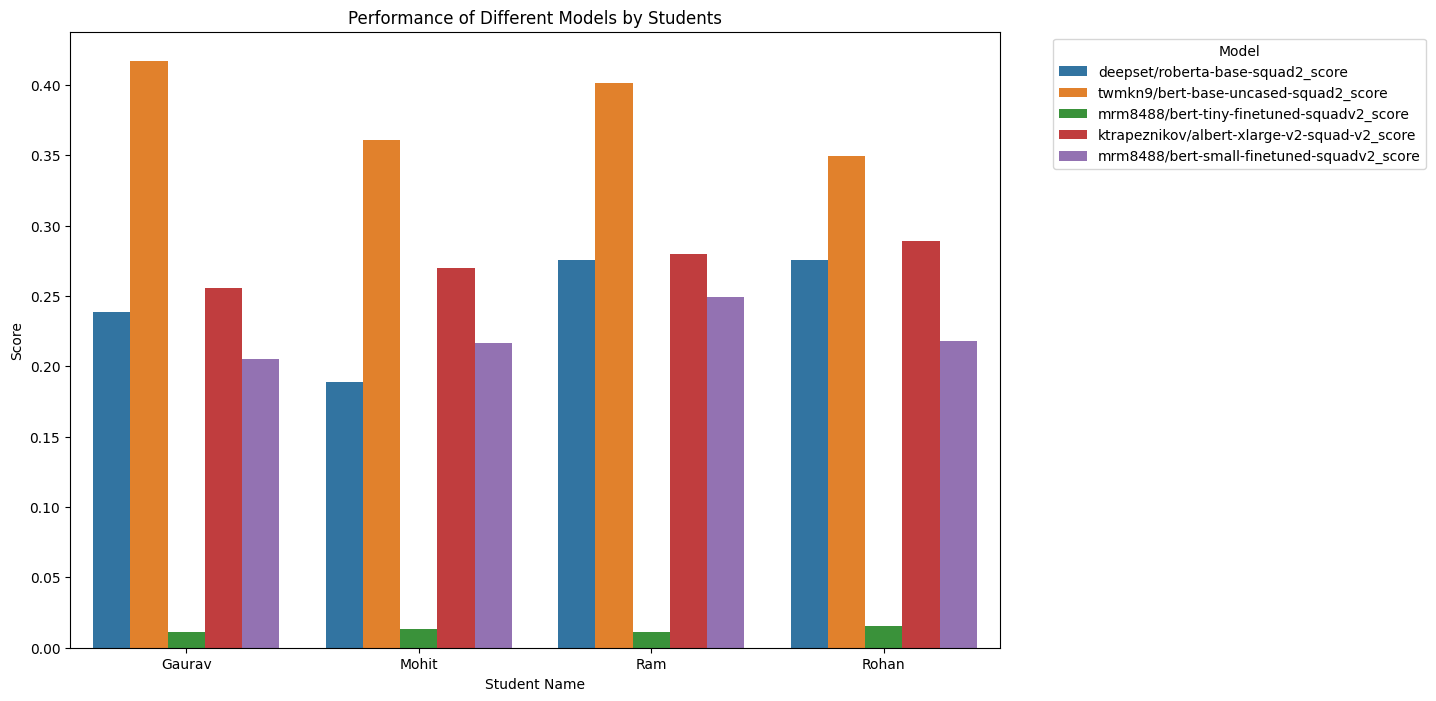

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame
df_melted = pd.melt(model, id_vars=['student_name', 'question_id'], var_name='model', value_name='score')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='student_name', y='score', hue='model', data=df_melted, ci=None)
plt.title('Performance of Different Models by Students')
plt.xlabel('Student Name')
plt.ylabel('Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- As depicted on the above chart, twmkn9/bert-base-uncased-squad2_score seems to give better score followed by ktrapeznikov/albert-xlarge-v2-squad-v2_score. Also, mrm8488/bert-tiny-finetuned-squadv2_score has the least score.
- We will drop mrm8488/bert-tiny-finetuned-squadv2_score for further analysis

Weitage among the pre-trained transformer models:

1. twmkn9/bert-base-uncased-squad2 =75%

2. ktrapeznikov/albert-xlarge-v2-squad-v2_score=10%

3. deepset/roberta-base-squad2_score =10%

4. mrm8488/bert-small-finetuned-squadv2_score = 5%

Also, added 1 to the cummulative data in order to have consistancy with the other scoring techniques.

In [ ]:
model

# Weightage among the pre-trained transformer models
weights = {
    'twmkn9/bert-base-uncased-squad2_score': 0.75,
    'ktrapeznikov/albert-xlarge-v2-squad-v2_score': 0.10,
    'deepset/roberta-base-squad2_score': 0.10,
    'mrm8488/bert-small-finetuned-squadv2_score': 0.05
}

# Calculate cumulative score
model['cumulative_pretrained_transformers'] = (model['twmkn9/bert-base-uncased-squad2_score'] * weights['twmkn9/bert-base-uncased-squad2_score'] +
                          model['ktrapeznikov/albert-xlarge-v2-squad-v2_score'] * weights['ktrapeznikov/albert-xlarge-v2-squad-v2_score'] +
                          model['deepset/roberta-base-squad2_score'] * weights['deepset/roberta-base-squad2_score'] +
                          model['mrm8488/bert-small-finetuned-squadv2_score'] * weights['mrm8488/bert-small-finetuned-squadv2_score']) + 1

# Display DataFrame with cumulative score
model


student_name question_id  deepset/roberta-base-squad2_score  \
0        Gaurav          Q1                           0.001567   
1        Gaurav         Q10                           0.252013   
2        Gaurav         Q11                           0.488093   
3        Gaurav         Q12                           0.117284   
4        Gaurav          Q2                           0.706100   
5        Gaurav          Q3                           0.006597   
6        Gaurav          Q4                           0.347978   
7        Gaurav          Q5                           0.045855   
8        Gaurav          Q6                           0.316319   
9        Gaurav          Q7                           0.149699   
10       Gaurav          Q8                           0.054758   
11       Gaurav          Q9                           0.379803   
12        Mohit          Q1                           0.005395   
13        Mohit         Q10                           0.038803   
14        Mohit         Q11                           0.100613   
15        Mohit         Q12                           0.162929   
16        Mohit          Q2                           0.584244   
17        Mohit          Q3                           0.005970   
18        Mohit          Q4                           0.465291   
19        Mohit          Q5                           0.006512   
20        Mohit          Q6                           0.457174   
21        Mohit          Q7                           0.019900   
22        Mohit          Q8                           0.108132   
23        Mohit          Q9                           0.309936   
24          Ram          Q1                           0.107530   
25          Ram         Q10                           0.218335   
26          Ram         Q11                           0.092856   
27          Ram         Q12                           0.122202   
28          Ram          Q2                           0.919804   
29          Ram          Q3                           0.018217   
30          Ram          Q4                           0.351294   
31          Ram          Q5                           0.063918   
32          Ram          Q6                           0.404121   
33          Ram          Q7                           0.416791   
34          Ram          Q8                           0.065295   
35          Ram          Q9                           0.526479   
36        Rohan          Q1                           0.000261   
37        Rohan         Q10                           0.191531   
38        Rohan         Q11                           0.101997   
39        Rohan         Q12                           0.110282   
40        Rohan          Q2                           0.956155   
41        Rohan          Q3                           0.002216   
42        Rohan          Q4                           0.441648   
43        Rohan          Q5                           0.105952   
44        Rohan          Q6                           0.190499   
45        Rohan          Q7                           0.090169   
46        Rohan          Q8                           0.428775   
47        Rohan          Q9                           0.684726   

    twmkn9/bert-base-uncased-squad2_score  \
0                                0.187992   
1                                0.464017   
2                                0.658663   
3                                0.914317   
4                                0.688811   
5                                0.015216   
6                                0.458191   
7                                0.029746   
8                                0.477761   
9                                0.308782   
10                               0.034249   
11                               0.766093   
12                               0.453408   
13                               0.269607   
14                               0.163036   
15                               0.164622   
16 

In [ ]:
df.shape

(48, 19)

In [ ]:
model.shape

(48, 8)

In [ ]:
model.rename(columns={'student_name': 'Student Name', 'question_id': 'Question ID'}, inplace=True)
#model.drop(columns='cumulative_score', inplace = True)
model

Student Name Question ID  deepset/roberta-base-squad2_score  \
0        Gaurav          Q1                           0.001567   
1        Gaurav         Q10                           0.252013   
2        Gaurav         Q11                           0.488093   
3        Gaurav         Q12                           0.117284   
4        Gaurav          Q2                           0.706100   
5        Gaurav          Q3                           0.006597   
6        Gaurav          Q4                           0.347978   
7        Gaurav          Q5                           0.045855   
8        Gaurav          Q6                           0.316319   
9        Gaurav          Q7                           0.149699   
10       Gaurav          Q8                           0.054758   
11       Gaurav          Q9                           0.379803   
12        Mohit          Q1                           0.005395   
13        Mohit         Q10                           0.038803   
14        Mohit         Q11                           0.100613   
15        Mohit         Q12                           0.162929   
16        Mohit          Q2                           0.584244   
17        Mohit          Q3                           0.005970   
18        Mohit          Q4                           0.465291   
19        Mohit          Q5                           0.006512   
20        Mohit          Q6                           0.457174   
21        Mohit          Q7                           0.019900   
22        Mohit          Q8                           0.108132   
23        Mohit          Q9                           0.309936   
24          Ram          Q1                           0.107530   
25          Ram         Q10                           0.218335   
26          Ram         Q11                           0.092856   
27          Ram         Q12                           0.122202   
28          Ram          Q2                           0.919804   
29          Ram          Q3                           0.018217   
30          Ram          Q4                           0.351294   
31          Ram          Q5                           0.063918   
32          Ram          Q6                           0.404121   
33          Ram          Q7                           0.416791   
34          Ram          Q8                           0.065295   
35          Ram          Q9                           0.526479   
36        Rohan          Q1                           0.000261   
37        Rohan         Q10                           0.191531   
38        Rohan         Q11                           0.101997   
39        Rohan         Q12                           0.110282   
40        Rohan          Q2                           0.956155   
41        Rohan          Q3                           0.002216   
42        Rohan          Q4                           0.441648   
43        Rohan          Q5                           0.105952   
44        Rohan          Q6                           0.190499   
45        Rohan          Q7                           0.090169   
46        Rohan          Q8                           0.428775   
47        Rohan          Q9                           0.684726   

    twmkn9/bert-base-uncased-squad2_score  \
0                                0.187992   
1                                0.464017   
2                                0.658663   
3                                0.914317   
4                                0.688811   
5                                0.015216   
6                                0.458191   
7                                0.029746   
8                                0.477761   
9                                0.308782   
10                               0.034249   
11                               0.766093   
12                               0.453408   
13                               0.269607   
14                               0.163036   
15                               0.164622   
16 

In [ ]:
# Merging the DataFrames with suffixes
df = pd.merge(df, model, on=['Student Name', 'Question ID'], how='inner', suffixes=('_df', '_model'))

# Display the updated DataFrame
df



Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0          1.0           1          Ram          Q1  Conceptual & Formulae   
1          2.0           2        Mohit          Q1  Conceptual & Formulae   
2          3.0           3        Rohan          Q1  Conceptual & Formulae   
3          4.0           4       Gaurav          Q1  Conceptual & Formulae   
4          5.0           1          Ram          Q2  Conceptual & Formulae   
5          6.0           2        Mohit          Q2  Conceptual & Formulae   
6          7.0           3        Rohan          Q2  Conceptual & Formulae   
7          8.0           4       Gaurav          Q2  Conceptual & Formulae   
8          9.0           1          Ram          Q3  Conceptual & Formulae   
9         10.0           2        Mohit          Q3  Conceptual & Formulae   
10        11.0           3        Rohan          Q3  Conceptual & Formulae   
11        12.0           4       Gaurav          Q3  Conceptual & Formulae   
12        13.0           1          Ram          Q4  Conceptual & Formulae   
13        14.0           2        Mohit          Q4  Conceptual & Formulae   
14        15.0           3        Rohan          Q4  Conceptual & Formulae   
15        16.0           4       Gaurav          Q4  Conceptual & Formulae   
16        17.0           1          Ram          Q5  Conceptual & Formulae   
17        18.0           2        Mohit          Q5  Conceptual & Formulae   
18        19.0           3        Rohan          Q5  Conceptual & Formulae   
19        20.0           4       Gaurav          Q5  Conceptual & Formulae   
20        21.0           1          Ram          Q6  Conceptual & Formulae   
21         NaN           2        Mohit          Q6  Conceptual & Formulae   
22         NaN           3        Rohan          Q6  Conceptual & Formulae   
23         NaN           4       Gaurav          Q6  Conceptual & Formulae   
24         NaN           1          Ram          Q7  Conceptual & Formulae   
25         NaN           2        Mohit          Q7  Conceptual & Formulae   
26         NaN           3        Rohan          Q7  Conceptual & Formulae   
27         NaN           4       Gaurav          Q7  Conceptual & Formulae   
28         NaN           1          Ram          Q8             Conceptual   
29         NaN           2        Mohit          Q8             Conceptual   
30         NaN           3        Rohan          Q8             Conceptual   
31         NaN           4       Gaurav          Q8             Conceptual   
32         NaN           1          Ram          Q9             Conceptual   
33         NaN           2        Mohit          Q9             Conceptual   
34         NaN           3        Rohan          Q9             Conceptual   
35         NaN           4       Gaurav          Q9             Conceptual   
36         NaN           1          Ram         Q10             Conceptual   
37         NaN           2        Mohit         Q10             Conceptual   
38         NaN           3        Rohan         Q10             Conceptual   
39         NaN           4       Gaurav         Q10             Conceptual   
40         NaN           1          Ram         Q11             Conceptual   
41         NaN           2        Mohit         Q11             Conceptual   
42         NaN           3        Rohan         Q11             Conceptual   
43         NaN           4       Gaurav         Q11             Conceptual   
44         NaN           1          Ram         Q12             Conceptual   
45         NaN           2        Mohit         Q12             Conceptual   
46         NaN           3        Rohan         Q12             Conceptual   
47         NaN           4       Gaurav         Q12             Conceptual   

                                             Question  \
0   Define Supervised learning and explain its cha...   
1   Define Supervised learning and explain its cha...   
2   Define

In [ ]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Student Name', 'Question ID',
       'Question Type', 'Question', 'Answer', 'Question_length',
       'Answer-length', 'num_words_question', 'num_words_answer',
       'Tokenized_Question', 'Tokenized_Answer', 'num_sent_quest',
       'num_sent_ans', 'score_noun_verb', 'score_grammar_check',
       'score_sent_len', 'score_transformer',
       'deepset/roberta-base-squad2_score_df',
       'twmkn9/bert-base-uncased-squad2_score_df',
       'mrm8488/bert-tiny-finetuned-squadv2_score_df',
       'ktrapeznikov/albert-xlarge-v2-squad-v2_score_df',
       'mrm8488/bert-small-finetuned-squadv2_score_df',
       'cumulative_pretrained_transformers_df',
       'deepset/roberta-base-squad2_score_model',
       'twmkn9/bert-base-uncased-squad2_score_model',
       'mrm8488/bert-tiny-finetuned-squadv2_score_model',
       'ktrapeznikov/albert-xlarge-v2-squad-v2_score_model',
       'mrm8488/bert-small-finetuned-squadv2_score_model',
       'cumulative_pretraine

In [ ]:
# Define the list of columns to be dropped
columns_to_drop = ['deepset/roberta-base-squad2_score_model',
       'twmkn9/bert-base-uncased-squad2_score_model',
       'mrm8488/bert-tiny-finetuned-squadv2_score_model',
       'ktrapeznikov/albert-xlarge-v2-squad-v2_score_model',
       'mrm8488/bert-small-finetuned-squadv2_score_model',]

# Permanently delete the specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
df


Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0          1.0           1          Ram          Q1  Conceptual & Formulae   
1          2.0           2        Mohit          Q1  Conceptual & Formulae   
2          3.0           3        Rohan          Q1  Conceptual & Formulae   
3          4.0           4       Gaurav          Q1  Conceptual & Formulae   
4          5.0           1          Ram          Q2  Conceptual & Formulae   
5          6.0           2        Mohit          Q2  Conceptual & Formulae   
6          7.0           3        Rohan          Q2  Conceptual & Formulae   
7          8.0           4       Gaurav          Q2  Conceptual & Formulae   
8          9.0           1          Ram          Q3  Conceptual & Formulae   
9         10.0           2        Mohit          Q3  Conceptual & Formulae   
10        11.0           3        Rohan          Q3  Conceptual & Formulae   
11        12.0           4       Gaurav          Q3  Conceptual & Formulae   
12        13.0           1          Ram          Q4  Conceptual & Formulae   
13        14.0           2        Mohit          Q4  Conceptual & Formulae   
14        15.0           3        Rohan          Q4  Conceptual & Formulae   
15        16.0           4       Gaurav          Q4  Conceptual & Formulae   
16        17.0           1          Ram          Q5  Conceptual & Formulae   
17        18.0           2        Mohit          Q5  Conceptual & Formulae   
18        19.0           3        Rohan          Q5  Conceptual & Formulae   
19        20.0           4       Gaurav          Q5  Conceptual & Formulae   
20        21.0           1          Ram          Q6  Conceptual & Formulae   
21         NaN           2        Mohit          Q6  Conceptual & Formulae   
22         NaN           3        Rohan          Q6  Conceptual & Formulae   
23         NaN           4       Gaurav          Q6  Conceptual & Formulae   
24         NaN           1          Ram          Q7  Conceptual & Formulae   
25         NaN           2        Mohit          Q7  Conceptual & Formulae   
26         NaN           3        Rohan          Q7  Conceptual & Formulae   
27         NaN           4       Gaurav          Q7  Conceptual & Formulae   
28         NaN           1          Ram          Q8             Conceptual   
29         NaN           2        Mohit          Q8             Conceptual   
30         NaN           3        Rohan          Q8             Conceptual   
31         NaN           4       Gaurav          Q8             Conceptual   
32         NaN           1          Ram          Q9             Conceptual   
33         NaN           2        Mohit          Q9             Conceptual   
34         NaN           3        Rohan          Q9             Conceptual   
35         NaN           4       Gaurav          Q9             Conceptual   
36         NaN           1          Ram         Q10             Conceptual   
37         NaN           2        Mohit         Q10             Conceptual   
38         NaN           3        Rohan         Q10             Conceptual   
39         NaN           4       Gaurav         Q10             Conceptual   
40         NaN           1          Ram         Q11             Conceptual   
41         NaN           2        Mohit         Q11             Conceptual   
42         NaN           3        Rohan         Q11             Conceptual   
43         NaN           4       Gaurav         Q11             Conceptual   
44         NaN           1          Ram         Q12             Conceptual   
45         NaN           2        Mohit         Q12             Conceptual   
46         NaN           3        Rohan         Q12             Conceptual   
47         NaN           4       Gaurav         Q12             Conceptual   

                                             Question  \
0   Define Supervised learning and explain its cha...   
1   Define Supervised learning and explain its cha...   
2   Define

In [ ]:
df.head()

Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0         1.0           1          Ram          Q1  Conceptual & Formulae   
1         2.0           2        Mohit          Q1  Conceptual & Formulae   
2         3.0           3        Rohan          Q1  Conceptual & Formulae   
3         4.0           4       Gaurav          Q1  Conceptual & Formulae   
4         5.0           1          Ram          Q2  Conceptual & Formulae   

                                            Question  \
0  Define Supervised learning and explain its cha...   
1  Define Supervised learning and explain its cha...   
2  Define Supervised learning and explain its cha...   
3  Define Supervised learning and explain its cha...   
4      How do you calculate the area of a rectangle?   

                                              Answer  Question_length  \
0  Supervised learning is a machine learning para...               74   
1  Supervised learning is a method where models a...               74   
2  Supervised learning involves algorithms like l...               74   
3  Supervised learning involves several algorithm...               74   
4     The area of a rectangle is length times width.               45   

   Answer-length  num_words_question  ...  score_grammar_check score_sent_len  \
0            265                   9  ...                  1.0              1   
1            177                   9  ...                  1.0              1   
2            144                   9  ...                  0.9              1   
3             87                   9  ...                  1.0              0   
4             46                   9  ...                  1.0              0   

  score_transformer  deepset/roberta-base-squad2_score_df  \
0          1.036304                              0.107530   
1          1.317218                              0.005395   
2          1.115964                              0.000261   
3          1.124591                              0.001567   
4          1.135514                              0.919804   

   twmkn9/bert-base-uncased-squad2_score_df  \
0                                  0.085974   
1                                  0.453408   
2                                  0.112251   
3                                  0.187992   
4                                  0.925264   

   mrm8488/bert-tiny-finetuned-squadv2_score_df  \
0                                      0.007545   
1                                      0.004998   
2                                      0.004072   
3                                      0.018526   
4                                      0.027798   

   ktrapeznikov/albert-xlarge-v2-squad-v2_score_df  \
0                                         0.013579   
1                                         0.123059   
2                                         0.010574   
3                                         0.004566   
4                                         0.664344   

   mrm8488/bert-small-finetuned-squadv2_score_df  \
0                                       0.014648   
1                                       0.048091   
2                                       0.105289   
3                                       0.093039   
4                                       0.619093   

   cumulative_pretrained_transformers_df  \
0                               1.077324   
1                               1.355306   
2                               1.090536   
3                               1.146259   
4                               1.883317   

   cumulative_pretrained_transformers_model  
0                                  1.077324  
1                                  1.355306  
2                                  1.090536  
3                                  1.146259  
4                                  1.883317  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Student Name', 'Question ID',
       'Question Type', 'Question', 'Answer', 'Question_length',
       'Answer-length', 'num_words_question', 'num_words_answer',
       'Tokenized_Question', 'Tokenized_Answer', 'num_sent_quest',
       'num_sent_ans', 'score_noun_verb', 'score_grammar_check',
       'score_sent_len', 'score_transformer',
       'deepset/roberta-base-squad2_score_df',
       'twmkn9/bert-base-uncased-squad2_score_df',
       'mrm8488/bert-tiny-finetuned-squadv2_score_df',
       'ktrapeznikov/albert-xlarge-v2-squad-v2_score_df',
       'mrm8488/bert-small-finetuned-squadv2_score_df',
       'cumulative_pretrained_transformers_df',
       'cumulative_pretrained_transformers_model'],
      dtype='object')

### Score Mechanism:
1. Model's scoreing obtained from five transformermodels=80%
2. Based on Count of Noun and Verb=2%
3. Based on correctness of Grammer=2%
4. Based on the length of the sentences used in Answers=1%
5. Based on Scoring System using Transformers (Default Model)=15%

In [ ]:
# Define weights for each criterion
weights = {
    'score_transformer': 0.15,
    'score_noun_verb': 0.02,
    'score_grammar_check': 0.02,
    'score_sent_len': 0.01,
    'cumulative_pretrained_transformers_model': 0.8
}

# Calculate individual scores for each criterion
df['score_transformer'] = df['score_transformer'] * weights['score_transformer']
df['score_noun_verb'] = df['score_noun_verb'] * weights['score_noun_verb']
df['score_grammar_check'] = df['score_grammar_check'] * weights['score_grammar_check']
df['score_sent_len'] = df['score_sent_len'] * weights['score_sent_len']

# Sum up the individual scores to get the cumulative score
df['cumulative_score'] = df[['score_transformer', 'score_noun_verb', 'score_grammar_check', 'score_sent_len', 'cumulative_pretrained_transformers_model']].sum(axis=1)

# Display the updated DataFrame
df


Unnamed: 0  Student ID Student Name Question ID          Question Type  \
0          1.0           1          Ram          Q1  Conceptual & Formulae   
1          2.0           2        Mohit          Q1  Conceptual & Formulae   
2          3.0           3        Rohan          Q1  Conceptual & Formulae   
3          4.0           4       Gaurav          Q1  Conceptual & Formulae   
4          5.0           1          Ram          Q2  Conceptual & Formulae   
5          6.0           2        Mohit          Q2  Conceptual & Formulae   
6          7.0           3        Rohan          Q2  Conceptual & Formulae   
7          8.0           4       Gaurav          Q2  Conceptual & Formulae   
8          9.0           1          Ram          Q3  Conceptual & Formulae   
9         10.0           2        Mohit          Q3  Conceptual & Formulae   
10        11.0           3        Rohan          Q3  Conceptual & Formulae   
11        12.0           4       Gaurav          Q3  Conceptual & Formulae   
12        13.0           1          Ram          Q4  Conceptual & Formulae   
13        14.0           2        Mohit          Q4  Conceptual & Formulae   
14        15.0           3        Rohan          Q4  Conceptual & Formulae   
15        16.0           4       Gaurav          Q4  Conceptual & Formulae   
16        17.0           1          Ram          Q5  Conceptual & Formulae   
17        18.0           2        Mohit          Q5  Conceptual & Formulae   
18        19.0           3        Rohan          Q5  Conceptual & Formulae   
19        20.0           4       Gaurav          Q5  Conceptual & Formulae   
20        21.0           1          Ram          Q6  Conceptual & Formulae   
21         NaN           2        Mohit          Q6  Conceptual & Formulae   
22         NaN           3        Rohan          Q6  Conceptual & Formulae   
23         NaN           4       Gaurav          Q6  Conceptual & Formulae   
24         NaN           1          Ram          Q7  Conceptual & Formulae   
25         NaN           2        Mohit          Q7  Conceptual & Formulae   
26         NaN           3        Rohan          Q7  Conceptual & Formulae   
27         NaN           4       Gaurav          Q7  Conceptual & Formulae   
28         NaN           1          Ram          Q8             Conceptual   
29         NaN           2        Mohit          Q8             Conceptual   
30         NaN           3        Rohan          Q8             Conceptual   
31         NaN           4       Gaurav          Q8             Conceptual   
32         NaN           1          Ram          Q9             Conceptual   
33         NaN           2        Mohit          Q9             Conceptual   
34         NaN           3        Rohan          Q9             Conceptual   
35         NaN           4       Gaurav          Q9             Conceptual   
36         NaN           1          Ram         Q10             Conceptual   
37         NaN           2        Mohit         Q10             Conceptual   
38         NaN           3        Rohan         Q10             Conceptual   
39         NaN           4       Gaurav         Q10             Conceptual   
40         NaN           1          Ram         Q11             Conceptual   
41         NaN           2        Mohit         Q11             Conceptual   
42         NaN           3        Rohan         Q11             Conceptual   
43         NaN           4       Gaurav         Q11             Conceptual   
44         NaN           1          Ram         Q12             Conceptual   
45         NaN           2        Mohit         Q12             Conceptual   
46         NaN           3        Rohan         Q12             Conceptual   
47         NaN           4       Gaurav         Q12             Conceptual   

                                             Question  \
0   Define Supervised learning and explain its cha...   
1   Define Supervised learning and explain its cha...   
2   Define

In [ ]:
df.to_csv("output.csv", index=False)

Total Score obtained by each student in 12 questions

In [ ]:
# group by 'Student Name' and sum the 'Total_score'
result = df.groupby('Student Name')['cumulative_score'].sum().reset_index()

result


Student Name  cumulative_score
0       Gaurav         19.213536
1        Mohit         18.734339
2          Ram         19.185002
3        Rohan         18.839789

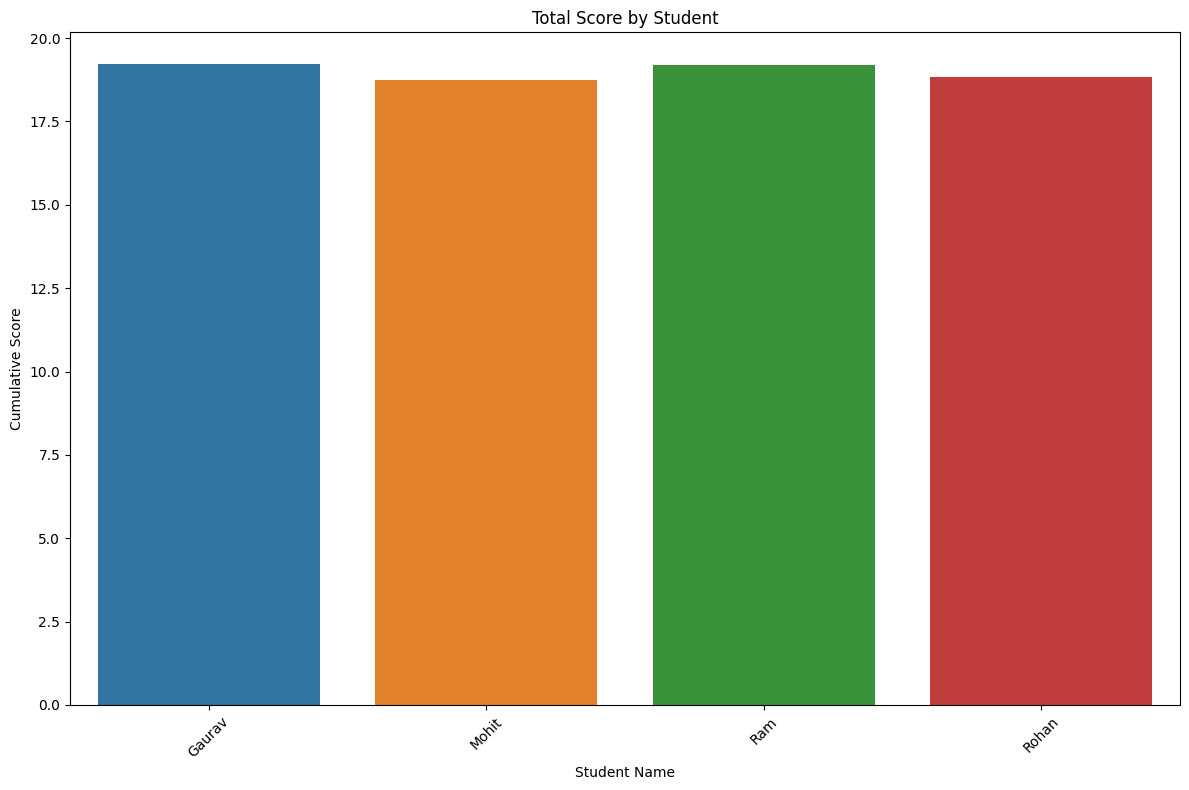

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting: total score obtained by each student in 12 question-answers
plt.figure(figsize=(12, 8))
sns.barplot(x='Student Name', y='cumulative_score', data=result, hue='Student Name')
plt.title('Total Score by Student')
plt.xlabel('Student Name')
plt.ylabel('Cumulative Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
